### CASE STUDY
### HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS

### Introduction:
Fraud can be defined as a dishonest act committed by an individual or a group of people with the knowledge and for the financial benefits. Healthcare fraud can be defined as misrepresenting information, concealing information or deceiving a person or an entity in order to get benefitted financially. In Health care the fraud involves the health care system by an individual, Physicians, Doctors, Healthcare providers and the insurance companies.

In our case, we will analyze all the details of the healthcare provider and conclude whether legitimate or not. If the providers fill all the details on behalf of the beneficiaries and makes a claim to get benefitted then it is considered as a Fraud. Health care fraud is one of the biggest problems in healthcare domain across world. In USA, the insurance company should clear all the compensations within 30 days of claim. So, there is less time to investigate carefully and also the claims are increasing rapidly so it’s hard to investigate all the claims manually. So, its wise adopt a computerized technique that automatically investigate through the beneficiary details and suggest whether a claim is Fraud or not.


### ML Formulation and Business problem:
From references we understand, according to the survey, it is estimated that over 15% of claims are fraud and insurance companies in USA incur losses over 30 billion USD annually. And in India insurance companies incur approximately 600-800 crores annually.

From given dataset our objective is the predict whether the provider is fraud or not. We need to obtain a probability score of the provider fraudulent activity, by analyzing the beneficiary details and reasons why healthcare provider is fraud. So that we can prevent insurance companies from incurring financial losses.


### Business constraints:
1. Cost of misclassification is very high, where if we predict legitimate provider as fraud (False Positive) it costs for further investigation and also a matter of companies’ reputation. If we predict fraud provider as a legitimate provider (False Negative) then we will end up with huge financial losses.
2. No strict latency requirements.
3. Feature interpretability is highly important- As Insurance company should justify the fraudulent activity of the provider and need to set up manual investigation if needed.

### Mapping to ML:
We need to build a binary classification algorithm based the details filled by the provider, inpatient data, outpatient data and beneficiary data to predict whether the health care provider is fraud or not.


### Data source
https://www.kaggle.com/datasets/rohitrox/healthcare-provider-fraud-detection-analysis

### Data Overview:
We have train and test data with 4 datasets each. Which are
1. Provider Data - contains details of healthcare provider and whether he is fraud or not.
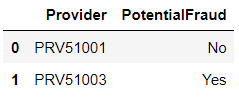
2. Beneficiary Data - contains details of all beneficiaries such as ID,DOB,DOD,state,country,diseases etc,.
3. Inpatient Data
4. Outpatient Data

### PERFORMANCE METRICS:
As our health care dataset is highly imbalanced, accuracy score is not a good metric to measure performance. And cost of misclassification is high we opt for following metrics.
1.	Confusion matrix
2.	F1 score – Harmonic mean of precision and recall.
3.	AUC score – Area under the curve, close to 1 better the model performance.
4.	FPR, FNR - cost of misclassification is high we need to check out these two metrics carefully, should be low for better model.



#### Research papers for references
1. https://cpb-us-w2.wpmucdn.com/sites.gatech.edu/dist/4/216/files/2015/09/p70-Statistical-Methods-for-Health-Care-Fraud-Detection.pdf
2. http://ijettjournal.org/archive/ijett-v69i3p216
3. https://www.researchgate.net/publication/282538462_Fraud_detection_in_health_insurance_using_data_mining_techniques
4. https://www.annalsofrscb.ro/index.php/journal/article/download/2409/2028/4484
5. https://www.hindawi.com/journals/scn/2021/9293877/
6. https://www.theseattledataguy.com/healthcare-fraud-detection-with-python/#page-content

### Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Provider Data

In [2]:
provider_data=pd.read_csv('Train.csv')
provider_data.head(2)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes


In [3]:
test_provider_data=pd.read_csv('Test.csv')
test_provider_data.head(2)

,Provider
0,PRV51002
1,PRV51006


In [4]:
provider_data.shape

(5410, 2)

In [5]:
provider_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


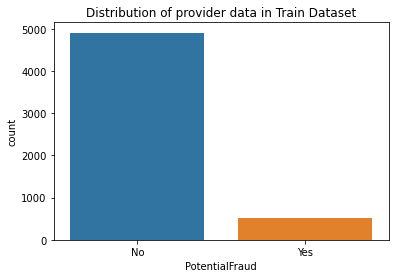

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(data=provider_data,x='PotentialFraud')
plt.title('Distribution of provider data in Train Dataset')
plt.show()

In [7]:
provider_data['PotentialFraud'].value_counts()

No     4904
Yes     506
Name: PotentialFraud, dtype: int64

#### Observations
1. we have 4904 genuine providers and 506 fraud providers in our train dataset.
2. out of 5410 providers only 9.35% providers are fraud

#### Beneficiary data

In [4]:
train_benf_data=pd.read_csv('Train_Beneficiarydata.csv')
train_benf_data.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50


In [5]:
test_benf_data= pd.read_csv('Test_Beneficiarydata.csv')
test_benf_data.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160


In [10]:
train_benf_data.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

#### Data overview
1. BeneID: It contains the unique id of the beneficiary.
2. DOB: It contains the Date of Birth of the beneficiary.
3. DOD: It contains the Date of Death of the beneficiary if the beneficiary id dead else null.
4. Gender, Race, State, Country: It contains the Gender, Race, State, Country of the beneficiary.
5. RenalDiseaseIndicator: It contains if the patient has existing kidney disease.
6. ChronicCond_*: The columns started with “ChronicCond_” indicates if the patient has existing that particular disease. Which also indicates the risk score of that patient.
7. IPAnnualReimbursementAmt: It consists of the maximum reimbursement amount for hospitalization annually.
8. IPAnnualDeductibleAmt: It consists of a premium paid by the patient for hospitalization annually.
9. OPAnnualReimbursementAmt: It consists of the maximum reimbursement amount for outpatient visits annually.
10. OPAnnualDeductibleAmt: It consists of a premium paid by the patient for outpatient visits annually.
11. NoOfMonths_PartACov:- Medicare has four parts. Part A provides coverage for hospital care
12. NoOfMonths_PartBCov:-while Part B provides outpatient medical services (ie, doctor visits).

In [11]:
train_benf_data.shape

(138556, 25)

In [12]:
train_benf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [13]:
train_benf_data.isna().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

1. The columns started with chronicCond_ are types of chronic diseases
#### ChronicCond_Alzheimer
Alzheimer's disease is a chronic neurodegenerative disease that destroys brain cells, causing thinking ability and memory to deteriorate over time. Alzheimer's disease is not a normal part of aging, and is irreversible.
#### ChronicCond_Heartfailure
Heart failure is a chronic, progressive condition in which the heart muscle is unable to pump enough blood to meet the body’s needs for blood and oxygen. Basically, the heart can’t keep up with its workload.
#### ChronicCond_KidneyDisease
Chronic kidney disease includes conditions that damage your kidneys and decrease their ability to keep you healthy by doing the jobs listed. If kidney disease gets worse, wastes can build to high levels in your blood and make you feel sick.
#### ChronicCond_Cancer
Colon cancer is a type of cancer that begins in the large intestine (colon). The colon is the final part of the digestive tract. Colon cancer typically affects older adults, though it can happen at any age.
#### ChronicCond_ObstrPulmonary
is a group of lung diseases that make it hard to breathe and get worse over time. 
#### ChronicCond_Depression 
The trademarks of chronic depression entail periods of sadness lasting for more than two weeks and for some individuals, as long as two years. In addition, individuals suffering from chronic depression experience more frequent and severe symptoms than those with situational depression.
#### ChronicCond_Diabetes 
Diabetes is a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces.
#### ChronicCond_IschemicHeart
It's the term given to heart problems caused by narrowed heart arteries. When arteries are narrowed, less blood and oxygen reaches the heart muscle. This is also called coronary artery disease and coronary heart disease. This can ultimately lead to heart attack.
#### ChronicCond_ObstrPulmonary 
Osteoporosis causes bones to become weak and brittle — so brittle that a fall or even mild stresses such as bending over or coughing can cause a fracture. Osteoporosis-related fractures most commonly occur in the hip, wrist or spine. Bone is living tissue that is constantly being broken down and replaced.
#### ChronicCond_rheumatoidarthritis 
Rheumatoid arthritis is a chronic inflammatory disorder that can affect more than just your joints. In some people, the condition can damage a wide variety of body systems, including the skin, eyes, lungs, heart and blood vessels.
#### ChronicCond_stroke 
“chronic stroke” refers to the period of recovery that takes place at least six months after the initial stroke event. When a patient enters this stage of recovery, their progress may appear slower than it did in the acute stage.

we have information of these diseases whether the patient is suffering from it or not. In given dataset 1 represents the patient had that disease and 2 represents not. For our convience we will convert that int0 1 and 0, where 0 represents not having disease

In [6]:
#replacing chronoc condition columns with values 1 nd 0
train_benf_data[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis','ChronicCond_stroke']] = train_benf_data[
    ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_KidneyDisease', 'ChronicCond_Cancer','ChronicCond_ObstrPulmonary',
     'ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart','ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']].replace(to_replace=2,value=0)

In [7]:
#replacing chronoc condition columns with values 1 nd 0
test_benf_data[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis','ChronicCond_stroke']] = test_benf_data[
    ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_KidneyDisease', 'ChronicCond_Cancer','ChronicCond_ObstrPulmonary',
     'ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart','ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']].replace(to_replace=2,value=0)

In [16]:
train_benf_data.ChronicCond_Alzheimer.value_counts()

0    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64

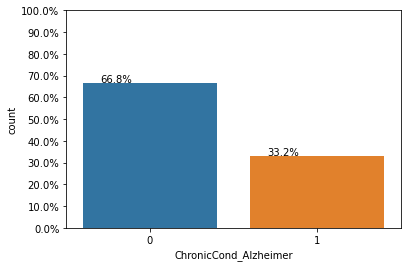

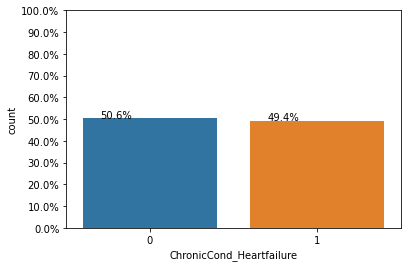

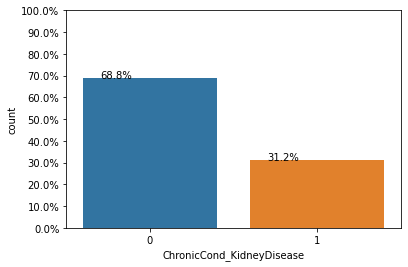

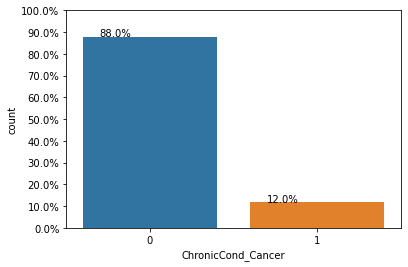

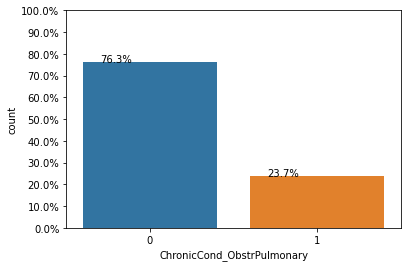

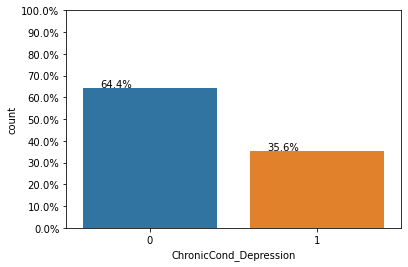

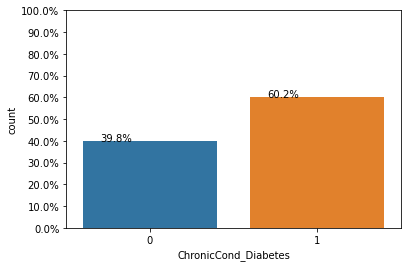

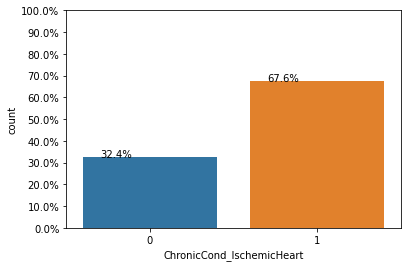

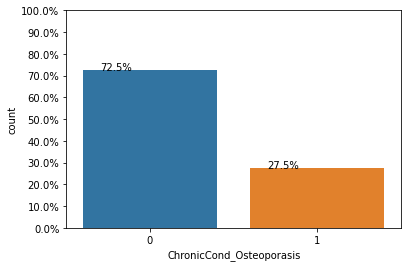

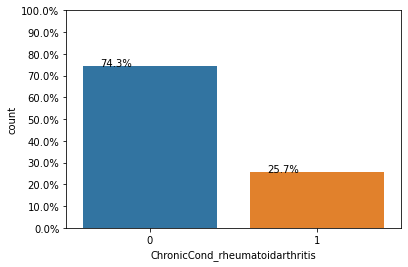

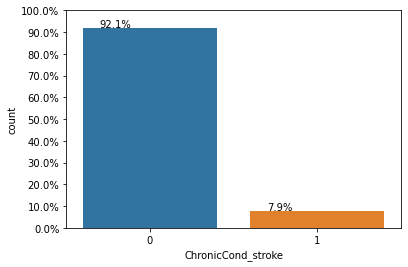

In [17]:
diseases=['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_KidneyDisease', 'ChronicCond_Cancer','ChronicCond_ObstrPulmonary',
     'ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart','ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis','ChronicCond_stroke']
for i,x in enumerate(diseases):
    fig = plt.figure(figsize=(6,4))
    ax=sns.countplot(data=train_benf_data,x=x)
    total = len(train_benf_data)*1
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))

    #adjust the ticklabel to the desired format, without changing the position of the ticks. 
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    plt.show()



#### Observations
1. The above plots shows the percentage of beneficiaries having particular disease.
2. we can observe minimum(7.9%) beneficiaries have ChronicCond_stroke and maximun(60.2%) have ChronicCond_Diabetes
<p> In order to get high level overview of this analysis i.e., how many diseases each beneficiary have we need to compute the risk score which is count of diseases each beneficiary have.</p>

#### Let's see how risk_score differentiates fraud claims

In [8]:
train_benf_data['risk_score']=train_benf_data['ChronicCond_Alzheimer']+train_benf_data['ChronicCond_Cancer']+train_benf_data['ChronicCond_Depression']\
                              +train_benf_data['ChronicCond_Diabetes']+train_benf_data['ChronicCond_Heartfailure']+train_benf_data['ChronicCond_IschemicHeart']\
                              +train_benf_data['ChronicCond_KidneyDisease']+train_benf_data['ChronicCond_KidneyDisease']+train_benf_data['ChronicCond_Osteoporasis']\
                              +train_benf_data['ChronicCond_Osteoporasis']+train_benf_data['ChronicCond_rheumatoidarthritis']
                                                                                                                             

In [9]:
test_benf_data['risk_score']=test_benf_data['ChronicCond_Alzheimer']+test_benf_data['ChronicCond_Cancer']+test_benf_data['ChronicCond_Depression']\
                              +test_benf_data['ChronicCond_Diabetes']+test_benf_data['ChronicCond_Heartfailure']+test_benf_data['ChronicCond_IschemicHeart']\
                              +test_benf_data['ChronicCond_KidneyDisease']+test_benf_data['ChronicCond_KidneyDisease']+test_benf_data['ChronicCond_Osteoporasis']\
                              +test_benf_data['ChronicCond_Osteoporasis']+test_benf_data['ChronicCond_rheumatoidarthritis']
                                                                                                                             

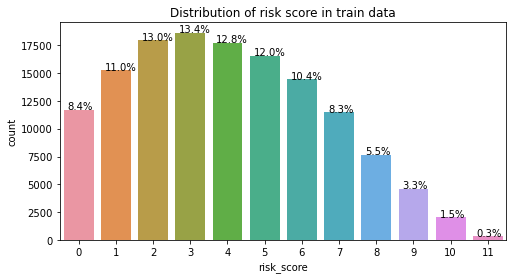

In [20]:
fig = plt.figure(figsize=(8,4))
ax=sns.countplot(data=train_benf_data,x='risk_score')
total = len(train_benf_data)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.title('Distribution of risk score in train data')
plt.show()

#### Observations 
1. The risk score distribution is right tailed curve.
2. And 8.4% beneficiaries have no diseases
3. And 0.3% beneficiaries have all diseases
4. most patients have 2-5 chronic diseases.

#### Analysing Age,Gender,State, Country

In [10]:
train_benf_data['DOB'] = pd.to_datetime(train_benf_data['DOB'] , format = '%Y-%m-%d')
train_benf_data['DOD'] = pd.to_datetime(train_benf_data['DOD'],format = '%Y-%m-%d',errors='ignore')

In [11]:
test_benf_data['DOB'] = pd.to_datetime(test_benf_data['DOB'] , format = '%Y-%m-%d')
test_benf_data['DOD'] = pd.to_datetime(test_benf_data['DOD'],format = '%Y-%m-%d',errors='ignore')

In [23]:
train_benf_data.DOD.max()

Timestamp('2009-12-01 00:00:00')

we can observe 2009-12-01 is the last date of death occured. we assume this and we calculate the age of beneficiariries which might impact our model.

#### will age be an interesting factor??

In [12]:
train_benf_data['age']= round(((train_benf_data['DOD'] -train_benf_data['DOB']).dt.days)/365)
train_benf_data['age']=train_benf_data['age'].fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - train_benf_data['DOB']).dt.days)/365))
train_benf_data.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,risk_score,age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,0,1,1,36000,3204,60,70,7,67.0
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,...,0,0,0,0,0,0,30,50,0,73.0


In [13]:
test_benf_data['age']= round(((test_benf_data['DOD'] -test_benf_data['DOB']).dt.days)/365)
test_benf_data['age']=test_benf_data['age'].fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - test_benf_data['DOB']).dt.days)/365))
test_benf_data.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,risk_score,age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,0,1,1,36000,3204,60,70,7,67.0
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,0,1,1,0,0,0,1490,160,6,69.0


In [26]:
train_benf_data.age.describe()

count    138556.000000
mean         73.622831
std          12.733335
min          26.000000
25%          68.000000
50%          74.000000
75%          82.000000
max         101.000000
Name: age, dtype: float64

In [27]:
age_101=train_benf_data[train_benf_data['age']==101]
print('there are {} people with maximum age 101'.format(age_101.shape[0]))

there are 370 people with maximum age 101


#### Observations
1. this seems illogical, people can live only 100 years maximum though there are some people who can live beyond that. But here we consider 100 is maximum age.
2. By this observation, we can conclude people with age above 100 are died.
3. we have 25% of beneficiaries with more than age 82 
4. And we have 75% of beneficiaries with age more than 68

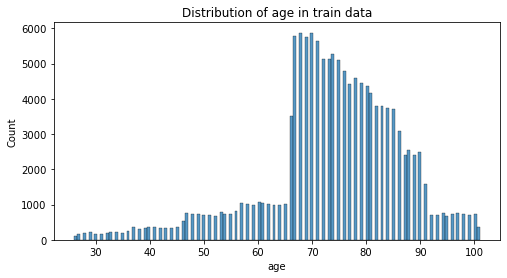

In [28]:
fig = plt.figure(figsize=(8,4))
ax=sns.histplot(data=train_benf_data,x='age')
plt.title('Distribution of age in train data')
plt.show()

#### Observations
1. we can observe more beneficiaries are from age 65-90
2. we have very less patients below age 50 and above age 90

#### Does patient liveliness imapacts fraud claims

In [14]:
# Set value=1 if the patient is dead i.e DOD value is not null and people with age above 90
train_benf_data['died'] = 0
train_benf_data.loc[train_benf_data.DOD.notna(), 'died'] = 1
train_benf_data.loc[train_benf_data.age > 90, 'died'] = 1

In [15]:
# Set value=1 if the patient is dead i.e DOD value is not null and people with age above 90
test_benf_data['died'] = 0
test_benf_data.loc[test_benf_data.DOD.notna(), 'died'] = 1
test_benf_data.loc[test_benf_data.age > 90, 'died'] = 1

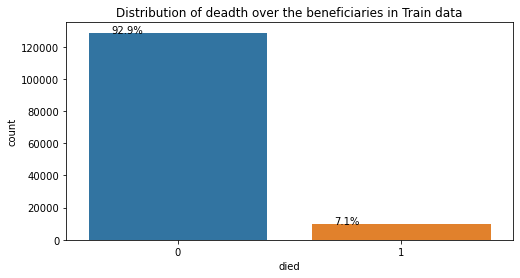

In [31]:
fig = plt.figure(figsize=(8,4))
ax=sns.countplot(data=train_benf_data,x='died')
total = len(train_benf_data)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.title('Distribution of deadth over the beneficiaries in Train data')
plt.show()

#### Observations
1. here we considered people with above 90 age and people with DOD is null as died
2. Because its obviouis in most cases people with diseases tend to die early.
3. After considering above statements we have 7.1% people died and 92.9% people as alive

#### Is gender helpful in differentiating!!!

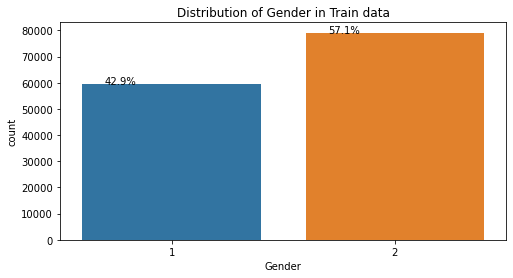

In [32]:
fig = plt.figure(figsize=(8,4))
ax=sns.countplot(data=train_benf_data,x='Gender')
total = len(train_benf_data)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.title('Distribution of Gender in Train data')
plt.show()

#### Obserevations
1. The both genders 1 and 2 are in the ratio 42.9% and 57.1%

#### Let's check the count of potential fraud claims for each state and see whether any state stand outs

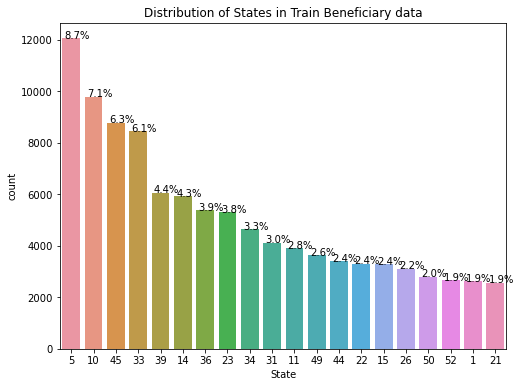

In [33]:
# Plot top 20 states from where the beneficiaries belong
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_benf_data,x='State', order =train_benf_data['State'].value_counts().head(20).index)
plt.title('Distribution of States in Train Beneficiary data')
total = len(train_benf_data)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

#### Observation:
1. Top 20 states considering beneficiary count are plotted above.
2. States with code 5, 10, 45, 33 and 39 are the top 5 states.
3. 8.7% of the beneficiaries belongs to state 5
4. Arround 30% of beneficiaries are from top 5 states.

#### Let's check the count of potential fraud claims for each country and see whether any state stand outs

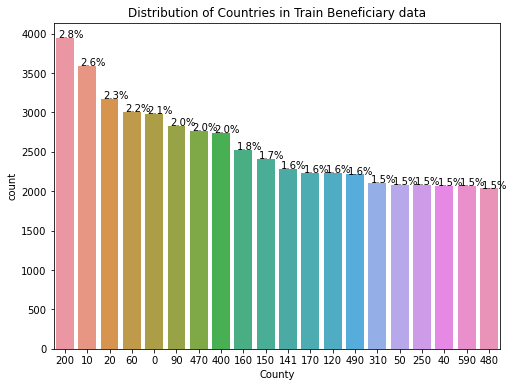

In [34]:
# Plot top 20 states from where the beneficiaries belong
plt.figure(figsize=(8,6))
ax = sns.countplot(data=train_benf_data,x='County', order =train_benf_data['County'].value_counts().head(20).index)
plt.title('Distribution of Countries in Train Beneficiary data')
total = len(train_benf_data)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

#### Observation:
1. Top 20 countries considering beneficiary count are plotted above.
2. Countries with code 200, 10, 20, 60 and 0 are the top 5 countries.
3. 2.8% of the beneficiaries belongs to state 200
4. Arround 12% of beneficiaries are from top 5 countries.

#### Oops! we don't have race4

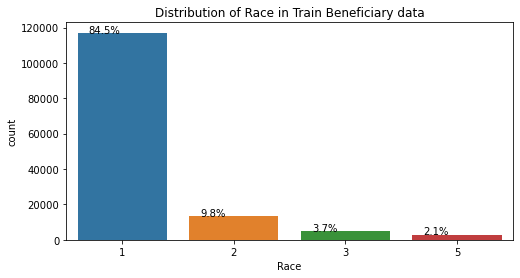

In [35]:
fig = plt.figure(figsize=(8,4))
ax=sns.countplot(data=train_benf_data,x='Race')
total = len(train_benf_data)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.title('Distribution of Race in Train Beneficiary data')
plt.show()

#### Observations
1. most of the beneficiaries belongs to race 1. (84.5%)
2. there are no beneficiaries belonging to race 4

#### Patients utilized No. of months in partA coverage( Hospital care coverage)

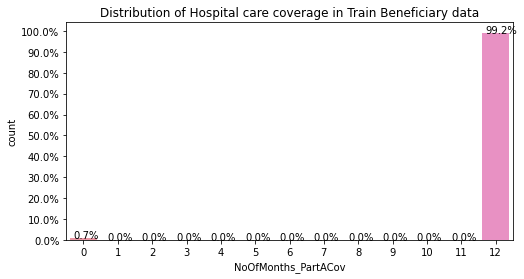

In [36]:
fig = plt.figure(figsize=(8,4))
ax=sns.countplot(data=train_benf_data,x='NoOfMonths_PartACov')
total = len(train_benf_data)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
ax.yaxis.set_ticks(np.linspace(0, total, 11))
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.title('Distribution of Hospital care coverage in Train Beneficiary data')
plt.show()

#### Observations
1. almost 99.2% beneficiaries utilized hospitalcare coverage in all months
2. only 0.7% beneficiaries have not utilized part A coverage

#### Patients utilized No. of months in partB coverage ( Medical services coverage)

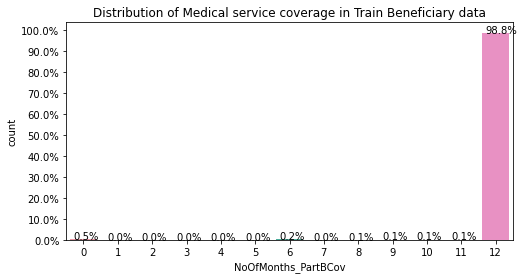

In [37]:
fig = plt.figure(figsize=(8,4))
ax=sns.countplot(data=train_benf_data,x='NoOfMonths_PartBCov')
total = len(train_benf_data)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
ax.yaxis.set_ticks(np.linspace(0, total, 11))
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.title('Distribution of Medical service coverage in Train Beneficiary data')
plt.show()

#### Observations
1. almost 98.8% beneficiaries utilized medical services such as doctor visits coverage in all months
2. only 0.5% beneficiaries have not utilized part B coverage

#### Lets see How much IPAnnualReimbursementAmt claimed

<Figure size 720x720 with 0 Axes>

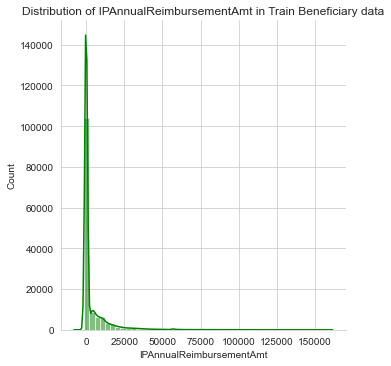

In [38]:
# Plot distribution of IPAnnualReimbursementAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
sns.displot(train_benf_data['IPAnnualReimbursementAmt'], kde = True, color ='green', bins = 50)
plt.title('Distribution of IPAnnualReimbursementAmt in Train Beneficiary data')
plt.show()

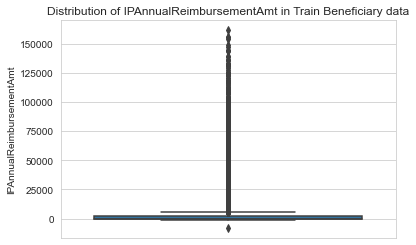

In [39]:
# Plot boxplot for IPAnnualReimbursementAmt
sns.boxplot(y='IPAnnualReimbursementAmt', data=train_benf_data)
plt.title('Distribution of IPAnnualReimbursementAmt in Train Beneficiary data')
plt.show()

In [40]:
for p in range(25,101,25):
    print(p, "percentile value is", np.percentile(train_benf_data['IPAnnualReimbursementAmt'], p))

25 percentile value is 0.0
50 percentile value is 0.0
75 percentile value is 2280.0
100 percentile value is 161470.0


In [41]:
for p in range(75,101,5):
    print(p, "percentile value is", np.percentile(train_benf_data['IPAnnualReimbursementAmt'], p))

75 percentile value is 2280.0
80 percentile value is 5000.0
85 percentile value is 8000.0
90 percentile value is 12000.0
95 percentile value is 20260.0
100 percentile value is 161470.0


In [42]:
for p in range(90,101):
    print(p, "percentile value is", np.percentile(train_benf_data['IPAnnualReimbursementAmt'], p))

90 percentile value is 12000.0
91 percentile value is 13000.0
92 percentile value is 14400.0
93 percentile value is 16000.0
94 percentile value is 18000.0
95 percentile value is 20260.0
96 percentile value is 24000.0
97 percentile value is 28243.50000000006
98 percentile value is 35000.0
99 percentile value is 49000.0
100 percentile value is 161470.0


In [43]:
for p in range(10,110,10):
    print(99+(p/100), "percentile value is", np.percentile(train_benf_data['IPAnnualReimbursementAmt'], 99+(p/100)))

99.1 percentile value is 51110.0
99.2 percentile value is 54000.0
99.3 percentile value is 57000.0
99.4 percentile value is 57100.0
99.5 percentile value is 59210.0
99.6 percentile value is 63000.0
99.7 percentile value is 67333.39999999967
99.8 percentile value is 74000.0
99.9 percentile value is 87000.0
100.0 percentile value is 161470.0


In [44]:
print('total inpatient annual reimbursement amount is', train_benf_data.IPAnnualReimbursementAmt.sum() )

total inpatient annual reimbursement amount is 507162970


#### Observations
1. 25th and 50th percentile of annual reimbursement amount is zero.
2. 75th and 99th percentile of annual reimbursement amount are 2800 and 49000 respectively.
3. we have listed the percventiles at each case and we observe 99.9 percentile is half the 100 percentile
3. There may be some outliers as 100th percentile is 161410.
4. Total annual reimbursement amount is 507162970.

#### lets see how much IPAnnualDeductibleAmt debited

<Figure size 720x720 with 0 Axes>

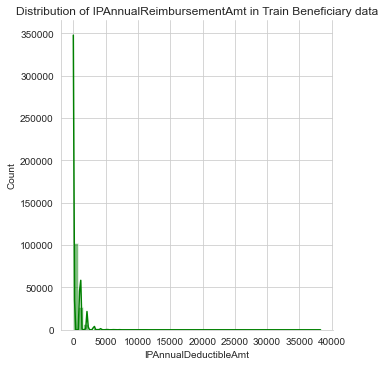

In [45]:
# Plot distribution of IPAnnualReimbursementAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
sns.displot(train_benf_data['IPAnnualDeductibleAmt'], kde = True, color ='green', bins = 50)
plt.title('Distribution of IPAnnualReimbursementAmt in Train Beneficiary data')
plt.show()

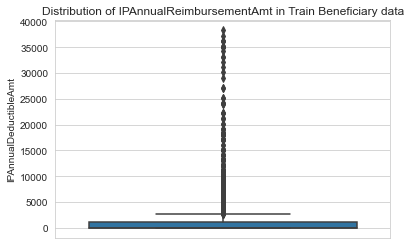

In [46]:
# Plot boxplot for IPAnnualReimbursementAmt
sns.boxplot(y='IPAnnualDeductibleAmt', data=train_benf_data)
plt.title('Distribution of IPAnnualReimbursementAmt in Train Beneficiary data')
plt.show()

In [47]:
for p in range(25,101,25):
    print(p, "percentile value is", np.percentile(train_benf_data['IPAnnualDeductibleAmt'], p))

25 percentile value is 0.0
50 percentile value is 0.0
75 percentile value is 1068.0
100 percentile value is 38272.0


In [48]:
for p in range(75,101,5):
    print(p, "percentile value is", np.percentile(train_benf_data['IPAnnualDeductibleAmt'], p))

75 percentile value is 1068.0
80 percentile value is 1068.0
85 percentile value is 1068.0
90 percentile value is 1068.0
95 percentile value is 2136.0
100 percentile value is 38272.0


In [49]:
for p in range(90,101):
    print(p, "percentile value is", np.percentile(train_benf_data['IPAnnualDeductibleAmt'], p))

90 percentile value is 1068.0
91 percentile value is 1068.0
92 percentile value is 1068.0
93 percentile value is 1068.0
94 percentile value is 2136.0
95 percentile value is 2136.0
96 percentile value is 2136.0
97 percentile value is 2136.0
98 percentile value is 2136.0
99 percentile value is 3204.0
100 percentile value is 38272.0


In [50]:
for p in range(10,110,10):
    print(99+(p/100), "percentile value is", np.percentile(train_benf_data['IPAnnualDeductibleAmt'], 99+(p/100)))

99.1 percentile value is 3204.0
99.2 percentile value is 3204.0
99.3 percentile value is 4136.0
99.4 percentile value is 4272.0
99.5 percentile value is 4272.0
99.6 percentile value is 4272.0
99.7 percentile value is 5340.0
99.8 percentile value is 6272.0
99.9 percentile value is 9068.0
100.0 percentile value is 38272.0


In [51]:
print('total inpatient annual deductable amount is', train_benf_data.IPAnnualDeductibleAmt.sum() )

total inpatient annual deductable amount is 55401242


#### Observations
1. 25th and 50th percentile of annual reimbursement amount is zero.
2. 75th and 99th percentile of annual reimbursement amount are 1068 and 3204 respectively.
3. we have listed the percventiles at each case and we observe 99.7 percentile is seven times the 100 percentile
3. There are some outliers as 100th percentile is 38272, from plot we can consider above 99.7% values as outliers
4. Total annual reimbursement amount is 55401242.

#### IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt

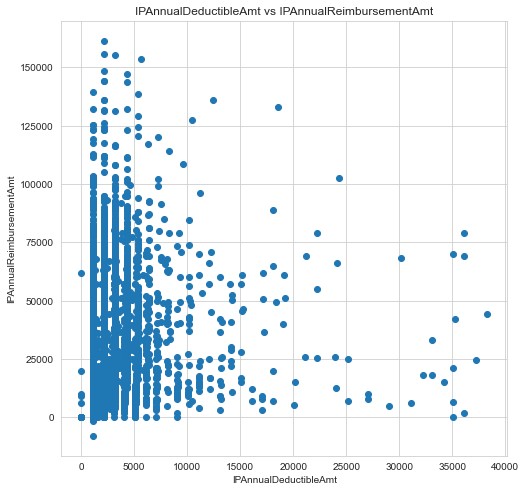

In [52]:
# Plot Scatterplot IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt
plt.figure(figsize=(8, 8))
plt.scatter(train_benf_data.IPAnnualDeductibleAmt, train_benf_data.IPAnnualReimbursementAmt)
plt.xlabel('IPAnnualDeductibleAmt')
plt.ylabel('IPAnnualReimbursementAmt')
plt.title('IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt')
plt.show()

### Observation:

IPAnnualDeductibleAmt indicated the amount paid by the beneficiary anually for inpatient claim and IPAnnualReimbursementAmt indicates the reimbursement amount the beneficiary is eligible for per annum.
1. For some of the beneficiaries even though the deductible amount is zero, reimbursement is very high.
2. For some of the beneficiaries deductible amount is very high but reimbursement amount zero or very low. <br>

#### lets see how much OPAnnualReimbursementAmt claimed

<Figure size 720x720 with 0 Axes>

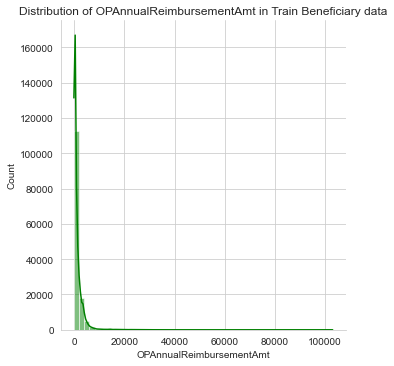

In [53]:
# Plot distribution of IPAnnualReimbursementAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
sns.displot(train_benf_data['OPAnnualReimbursementAmt'], kde = True, color ='green', bins = 50)
plt.title('Distribution of OPAnnualReimbursementAmt in Train Beneficiary data')
plt.show()

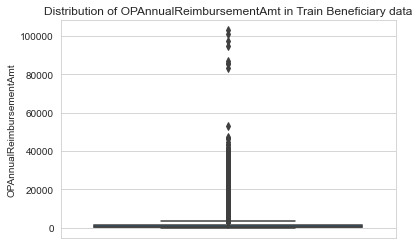

In [54]:
# Plot boxplot for IPAnnualReimbursementAmt
sns.boxplot(y='OPAnnualReimbursementAmt', data=train_benf_data)
plt.title('Distribution of OPAnnualReimbursementAmt in Train Beneficiary data')
plt.show()

In [55]:
for p in range(25,101,25):
    print(p, "percentile value is", np.percentile(train_benf_data['OPAnnualReimbursementAmt'], p))

25 percentile value is 170.0
50 percentile value is 570.0
75 percentile value is 1500.0
100 percentile value is 102960.0


In [56]:
for p in range(75,101,5):
    print(p, "percentile value is", np.percentile(train_benf_data['OPAnnualReimbursementAmt'], p))

75 percentile value is 1500.0
80 percentile value is 1890.0
85 percentile value is 2400.0
90 percentile value is 3230.0
95 percentile value is 4370.0
100 percentile value is 102960.0


In [57]:
for p in range(90,101):
    print(p, "percentile value is", np.percentile(train_benf_data['OPAnnualReimbursementAmt'], p))

90 percentile value is 3230.0
91 percentile value is 3380.500000000029
92 percentile value is 3560.0
93 percentile value is 3780.0
94 percentile value is 4030.0
95 percentile value is 4370.0
96 percentile value is 4850.0
97 percentile value is 5540.0
98 percentile value is 6850.0
99 percentile value is 11514.500000000116
100 percentile value is 102960.0


In [58]:
for p in range(10,110,10):
    print(99+(p/100), "percentile value is", np.percentile(train_benf_data['OPAnnualReimbursementAmt'], 99+(p/100)))

99.1 percentile value is 12680.250000000233
99.2 percentile value is 13840.0
99.3 percentile value is 14741.149999999907
99.4 percentile value is 16173.400000000256
99.5 percentile value is 17666.750000000175
99.6 percentile value is 19197.79999999999
99.7 percentile value is 21406.699999999837
99.8 percentile value is 24230.0
99.9 percentile value is 28694.45000000007
100.0 percentile value is 102960.0


In [59]:
print('total outpatient annual reimbursement amount is', train_benf_data.OPAnnualReimbursementAmt.sum() )

total outpatient annual reimbursement amount is 179876080


### Observation:

1. 25th and 50th percentile of outpatient annual reimbursement amounts are 170 and 570 respectively.
2. 75th and 99th percentile of outpatient annual reimbursement amount are 1500 and 11514 respectively.
3. There is huge difference between 99.5 percentile to 100 percentile
3. There are some outliers as 100th percentile is 102960.
4. Total outpatient annual reimbursement amount is 179876080.

#### lets see how much OPAnnualDeductibleAmt debited

<Figure size 720x720 with 0 Axes>

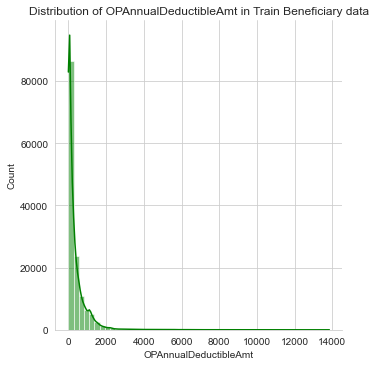

In [60]:
# Plot distribution of IPAnnualReimbursementAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
sns.displot(train_benf_data['OPAnnualDeductibleAmt'], kde = True, color ='green', bins = 50)
plt.title('Distribution of OPAnnualDeductibleAmt in Train Beneficiary data')
plt.show()

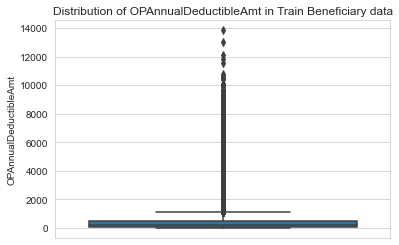

In [61]:
# Plot boxplot for IPAnnualReimbursementAmt
sns.boxplot(y='OPAnnualDeductibleAmt', data=train_benf_data)
plt.title('Distribution of OPAnnualDeductibleAmt in Train Beneficiary data')
plt.show()

In [62]:
for p in range(25,101,25):
    print(p, "percentile value is", np.percentile(train_benf_data['OPAnnualDeductibleAmt'], p))

25 percentile value is 40.0
50 percentile value is 170.0
75 percentile value is 460.0
100 percentile value is 13840.0


In [63]:
for p in range(75,101,5):
    print(p, "percentile value is", np.percentile(train_benf_data['OPAnnualDeductibleAmt'], p))

75 percentile value is 460.0
80 percentile value is 580.0
85 percentile value is 740.0
90 percentile value is 1000.0
95 percentile value is 1340.0
100 percentile value is 13840.0


In [64]:
for p in range(90,101):
    print(p, "percentile value is", np.percentile(train_benf_data['IPAnnualDeductibleAmt'], p))

90 percentile value is 1068.0
91 percentile value is 1068.0
92 percentile value is 1068.0
93 percentile value is 1068.0
94 percentile value is 2136.0
95 percentile value is 2136.0
96 percentile value is 2136.0
97 percentile value is 2136.0
98 percentile value is 2136.0
99 percentile value is 3204.0
100 percentile value is 38272.0


In [65]:
for p in range(10,110,10):
    print(99+(p/100), "percentile value is", np.percentile(train_benf_data['OPAnnualDeductibleAmt'], 99+(p/100)))

99.1 percentile value is 3180.0
99.2 percentile value is 3435.5999999999767
99.3 percentile value is 3720.0
99.4 percentile value is 4100.0
99.5 percentile value is 4502.250000000058
99.6 percentile value is 4970.0
99.7 percentile value is 5440.0
99.8 percentile value is 6070.0
99.9 percentile value is 7040.0
100.0 percentile value is 13840.0


In [66]:
print('total outpatient annual deductable amount is', train_benf_data.OPAnnualDeductibleAmt.sum() )

total outpatient annual deductable amount is 52335131


### Observation:

1. 25th and 50th percentile of annual reimbursement amounts are 40 and 170 respectively.
2. 75th and 99th percentile of annual reimbursement amount are 460 and 2960 respectively.
3. There is difference between 99 percentile to 100 percentile.
3. There may be some outliers as 100th percentile is 13840.
4. Total annual reimbursement amount is 52335131.

#### OPAnnualDeductibleAmt vs OPAnnualReimbursementAmt

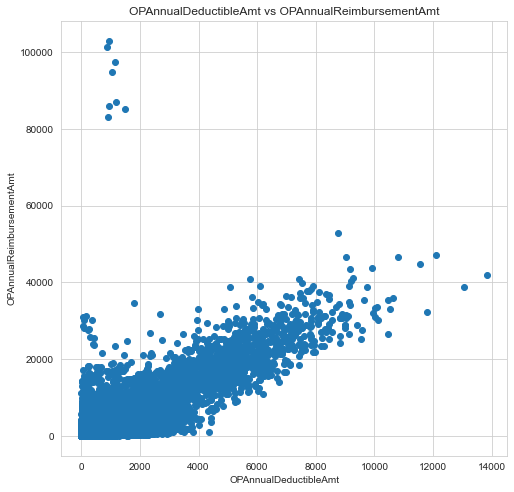

In [67]:
# Plot Scatterplot IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt
plt.figure(figsize=(8, 8))
plt.scatter(train_benf_data.OPAnnualDeductibleAmt, train_benf_data.OPAnnualReimbursementAmt)
plt.xlabel('OPAnnualDeductibleAmt')
plt.ylabel('OPAnnualReimbursementAmt')
plt.title('OPAnnualDeductibleAmt vs OPAnnualReimbursementAmt')
plt.show()

### Observation:

OPAnnualDeductibleAmt indicated the amount paid by the beneficiary anually for outpatient claim and OPAnnualReimbursementAmt indicates the reimbursement amount the beneficiary is eligible for per annum.
1. The scatterplot seems to be linear.
2. Though there are some beneficiaries with low reimbursement amount and high deductible amount
3. There are some beneficiaries with high dectable amount and low reimbursement amount

### Analyzing Inpatient data

In [16]:
train_inpatient=pd.read_csv('Train_Inpatientdata.csv')
train_inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [17]:
test_inpatient = pd.read_csv('Test_Inpatientdata.csv')
test_inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN


In [70]:
train_inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

#### Data overview
1. BeneID: It contains the unique id of each beneficiary i.e patients.
2. ClaimID: It contains the unique id of the claim submitted by the provider.
3. ClaimStartDt: It contains the date when the claim started in yyyy-mm-dd format.
4. ClaimEndDt: It contains the date when the claim ended in yyyy-mm-dd format.
5. Provider: It contains the unique id of the provider.
6. InscClaimAmtReimbursed: It contains the amount reimbursed for that particular claim.
7. AttendingPhysician: It contains the id of the Physician who attended the patient.
8. OperatingPhysician: It contains the id of the Physician who operated on the patient.
9. OtherPhysician: It contains the id of the Physician other than AttendingPhysician and OperatingPhysician who treated the patient.
10. ClmDiagnosisCode: It contains codes of the diagnosis performed by the provider on the patient for that claim.
11. ClmProcedureCode: It contains the codes of the procedures of the patient for treatment for that particular claim.
12. DeductibleAmtPaid: It consists of the amount by the patient. That is equal to Total_claim_amount — Reimbursed_amount.
13. AdmissionDt: It contains the date on which the patient was admitted into the hospital in yyyy-mm-dd format.
14. DischargeDt: It contains the date on which the patient was discharged from the hospital in yyyy-mm-dd format.
15. DiagnosisGroupCode: It contains a group code for the diagnosis done on the patient.

In [71]:
train_inpatient.isna().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

1. There are many values in the columns regarding physician data and claim diagnosis code ande claim procedure code.
2, we have miising data in deductibleamountpaid column which may be important factor for analysisng data.

#### ClaimStartDt and ClaimEndDt

In [18]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
train_inpatient['ClaimStartDt'] = pd.to_datetime(train_inpatient['ClaimStartDt'] , format = '%Y-%m-%d')
train_inpatient['ClaimEndDt'] = pd.to_datetime(train_inpatient['ClaimEndDt'],format = '%Y-%m-%d')

test_inpatient['ClaimStartDt'] = pd.to_datetime(test_inpatient['ClaimStartDt'] , format = '%Y-%m-%d')
test_inpatient['ClaimEndDt'] = pd.to_datetime(test_inpatient['ClaimEndDt'],format = '%Y-%m-%d')

#### Lets have a look on how many days it took for each claim and how does it helps in differentiating fraud claims

In [19]:
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
train_inpatient['claim_period'] = ((train_inpatient['ClaimEndDt'] - train_inpatient['ClaimStartDt']).dt.days)+1

test_inpatient['claim_period'] = ((test_inpatient['ClaimEndDt'] - test_inpatient['ClaimStartDt']).dt.days)+1

In [74]:
train_inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,claim_period
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,3


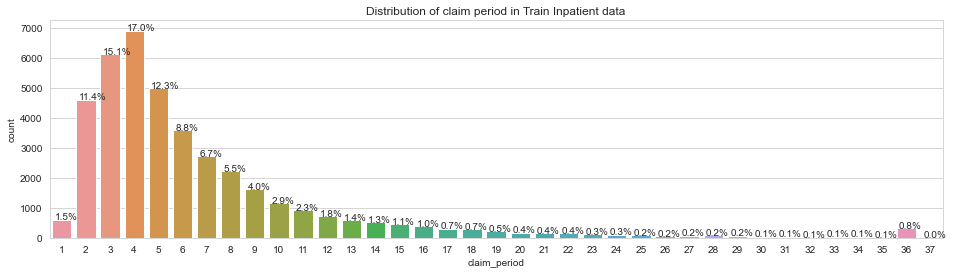

In [75]:
fig = plt.figure(figsize=(16,4))
ax=sns.countplot(data=train_inpatient,x='claim_period')
total = len(train_inpatient)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.title('Distribution of claim period in Train Inpatient data')
plt.show()

#### Obsewervations
1. we got a right tailed curve
2. most of the claims take maximum period of 12-15 days
3. while some claims took more than 30 days.

#### AdmissionDt and DischargeDt

In [20]:
# convert AdmissionDt, DischargeDt from string to datetime format
train_inpatient['AdmissionDt'] = pd.to_datetime(train_inpatient['AdmissionDt'] , format = '%Y-%m-%d')
train_inpatient['DischargeDt'] = pd.to_datetime(train_inpatient['DischargeDt'],format = '%Y-%m-%d')

test_inpatient['AdmissionDt'] = pd.to_datetime(test_inpatient['AdmissionDt'] , format = '%Y-%m-%d')
test_inpatient['DischargeDt'] = pd.to_datetime(test_inpatient['DischargeDt'],format = '%Y-%m-%d')

#### Here is the distribution of days for which each beneficiary is hospitalized

In [21]:
# Calculate Hospitalized_period = DischargeDt - AdmissionDt
train_inpatient['Hospitalized_period'] = ((train_inpatient['DischargeDt'] - train_inpatient['AdmissionDt']).dt.days)+1

test_inpatient['Hospitalized_period'] = ((test_inpatient['DischargeDt'] - test_inpatient['AdmissionDt']).dt.days)+1

In [43]:
train_inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,claim_period,Hospitalized_period
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,3,3


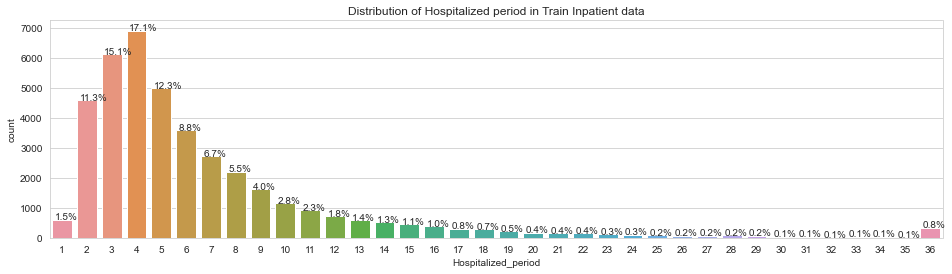

In [79]:
fig = plt.figure(figsize=(16,4))
ax=sns.countplot(data=train_inpatient,x='Hospitalized_period')
total = len(train_inpatient)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.title('Distribution of Hospitalized period in Train Inpatient data')
plt.show()

#### Obsewervations
1. we got a right tailed curve
2. most of the patients were admitted for a maximum period of 12-15 days
3. while some patients were admitted for more than 30 days.

#### From both the features claim period and hospitalized period, we can suspect some fraud claims, while a legitimate claim claim for right info i.e, claim period and hospitalized period would be same or might be less than that. so if we calculate the extra days patient claimed we can suspect them.

In [22]:
# ExtraClaimDays = Claim_Period - Hospitalization_Duration
train_inpatient['ExtraClaimDays'] = np.where(train_inpatient['claim_period']>train_inpatient['Hospitalized_period'], train_inpatient['claim_period'] - train_inpatient['Hospitalized_period'], 0)
test_inpatient['ExtraClaimDays'] = np.where( test_inpatient['claim_period']>test_inpatient['Hospitalized_period'], test_inpatient['claim_period'] - test_inpatient['Hospitalized_period'], 0)

In [81]:
train_inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,claim_period,Hospitalized_period,ExtraClaimDays
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,3,3,0


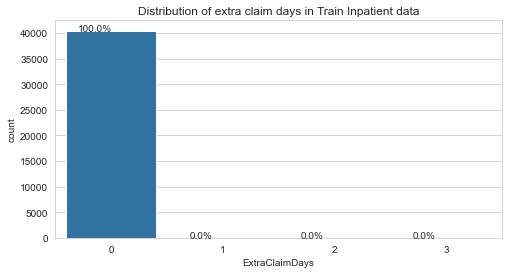

In [82]:
fig = plt.figure(figsize=(8,4))
ax=sns.countplot(data=train_inpatient,x='ExtraClaimDays')
total = len(train_inpatient)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.title('Distribution of extra claim days in Train Inpatient data')
plt.show()

In [83]:
train_inpatient['ExtraClaimDays'].value_counts()

0    40457
3        8
1        5
2        4
Name: ExtraClaimDays, dtype: int64

#### Observations
1. out of total claims 100% claimed for less no of days than they are hospitalized days or exactly same days.
2. 8 claimed for 3 extra days
3. 5 claimed for 1 extra day
4. 4 claimed for 2 extra days

In [14]:
print('we have totally {} no of beneficiaries'.format( len(train_inpatient['BeneID'].unique()) ) )

we have totally 31289 no of beneficiaries


#### Here are the top 20 beneficiaries based on their claims, lets see who stands out

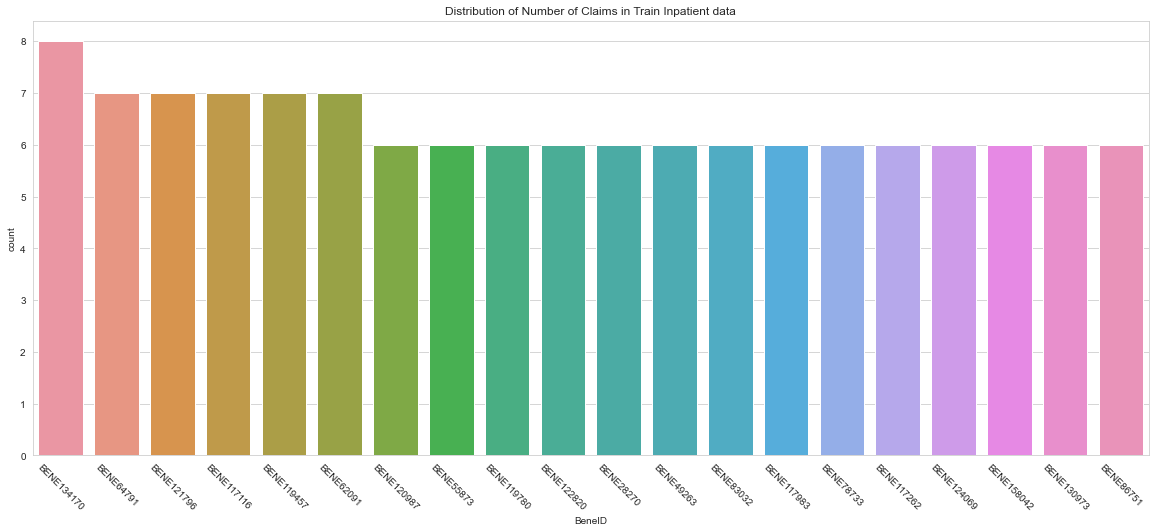

In [84]:
#top 20 beneficiaries
fig = plt.figure(figsize=(20,8))
ax=sns.countplot(data=train_inpatient,x='BeneID',order = train_inpatient['BeneID'].value_counts().iloc[:20].index)
total = len(train_inpatient)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.xticks(rotation=-45)
plt.title('Distribution of Number of Claims in Train Inpatient data')
plt.show()

#### Observations
1. BENE134170 claimed maximum number of inpatient claims that is 8.
2. Another 5 beneficiaries (BENE64791,BENE121796,BENE119457,BENE62091) claimed 7 claims, shown in the plot.
3. remaining claimed for 6 days

In [15]:
print('we have totally {} no of Attending physicians'.format( len(train_inpatient['AttendingPhysician'].unique()) ) )

we have totally 11605 no of Attending physicians


#### Here are the top 20 Attending physicians data, lets see who stands out

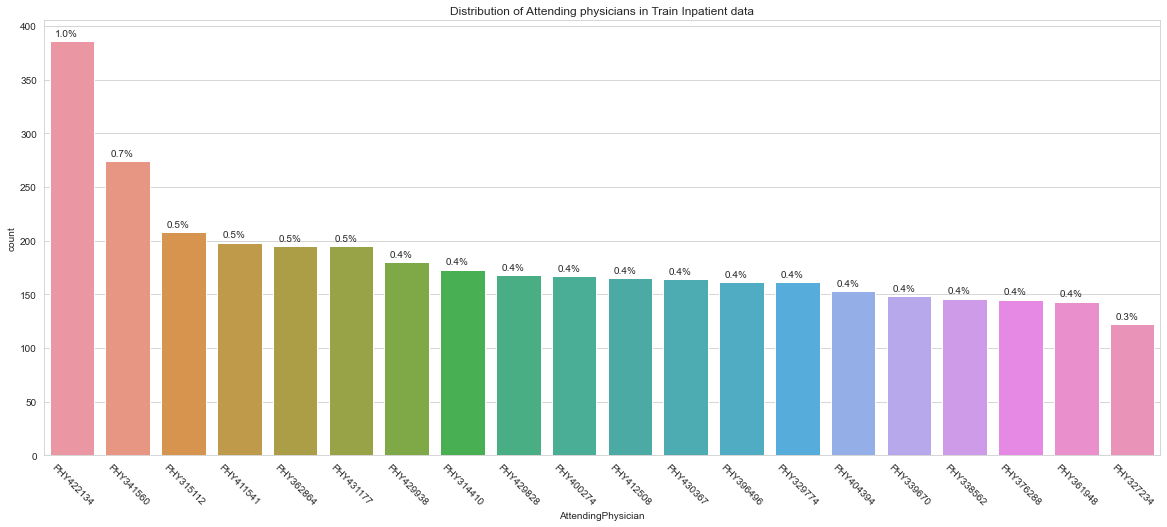

In [86]:
#top 20 Attending physicians
fig = plt.figure(figsize=(20,8))
ax=sns.countplot(data=train_inpatient,x='AttendingPhysician',order = train_inpatient['AttendingPhysician'].value_counts().iloc[:20].index)
total = len(train_inpatient)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.xticks(rotation=-45)
plt.title('Distribution of Attending physicians in Train Inpatient data')
plt.show()

#### Observations
1. top 20 attending physicians are plotted above
2. PHY422134 has treated 1% of total patients.
3. PHY422134, PHY341560, PHY315112, PHY411541, PHY431177 are the top 5 attending physicians.

In [16]:
print('we have totally {} no of Operating Physicians'.format( len(train_inpatient['OperatingPhysician'].unique()) ) )

we have totally 8288 no of Operating Physicians


#### Here are the top 20 Operating physicians data, lets see who stands out¶

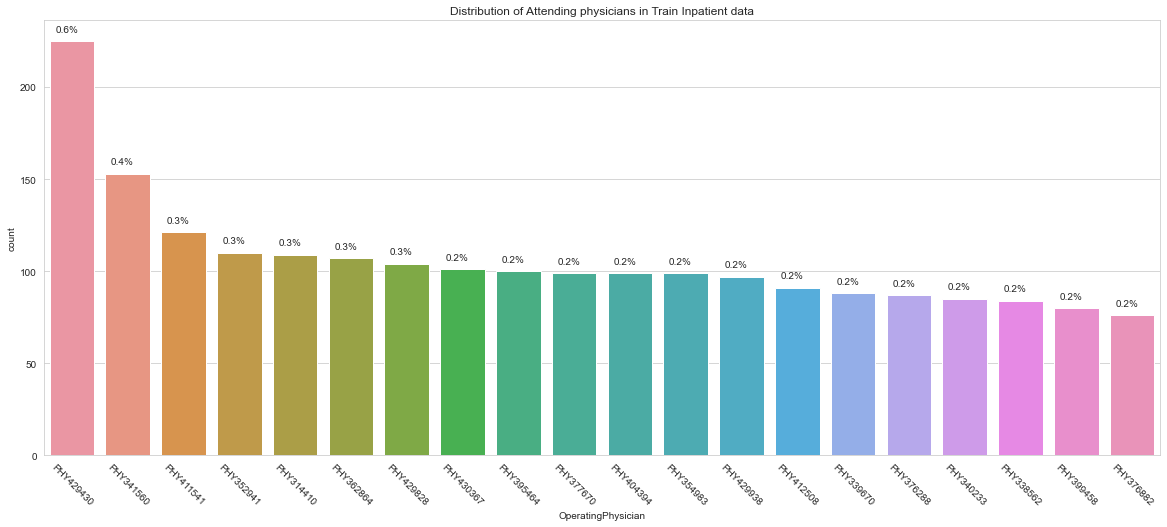

In [87]:
#top 20 OperatingPhysician
fig = plt.figure(figsize=(20,8))
ax=sns.countplot(data=train_inpatient,x='OperatingPhysician',order = train_inpatient['OperatingPhysician'].value_counts().iloc[:20].index)
total = len(train_inpatient)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.xticks(rotation=-45)
plt.title('Distribution of Attending physicians in Train Inpatient data')
plt.show()

#### Observations
1. PHY429430, PHY341560, PHY411541, PHY352941, PHY314410 are the top 5 operating physicians.
2. PHY429430 has operated 0.6% of the total patients.
3.PHY341560 has operated 0.4% of total patients

In [17]:
print('we have totally {} no of Other Physicians'.format( len(train_inpatient['OtherPhysician'].unique()) ) )

we have totally 2878 no of Other Physicians


#### Here are the top 20 Other physicians data, lets see who stands out¶

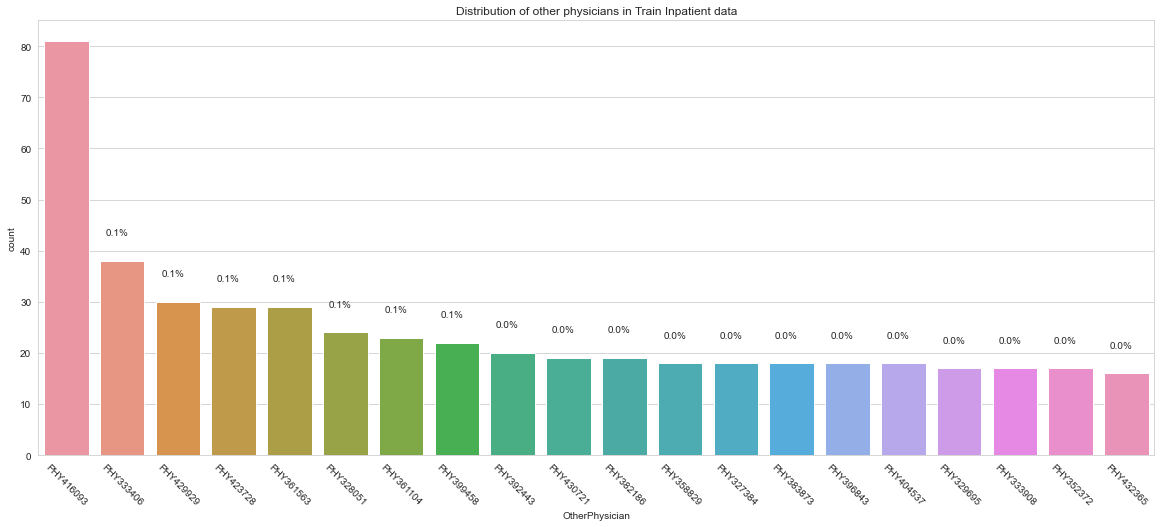

In [88]:
#top 20 OtherPhysician
fig = plt.figure(figsize=(20,8))
ax=sns.countplot(data=train_inpatient,x='OtherPhysician',order = train_inpatient['OtherPhysician'].value_counts().iloc[:20].index)
total = len(train_inpatient)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.xticks(rotation=-45)
plt.title('Distribution of other physicians in Train Inpatient data')
plt.show()

#### Observations
1. PHY416093 has treated 80 patients
2. PHY416093, PHY333406, PHY429929, PHY423728, PHY361563 are the top 5 other physicians

#### if both attending amd operating physicians are same for a patient, then it is suspicious. so we are adding another feature for same physician for both attending and operating

In [23]:
# ExtraClaimDays = Claim_Period - Hospitalization_Duration
train_inpatient['same_physician'] = np.where(train_inpatient['AttendingPhysician']==train_inpatient['OperatingPhysician'] , 1, 0)
test_inpatient['same_physician'] = np.where( test_inpatient['AttendingPhysician']==test_inpatient['OperatingPhysician'], 1, 0)

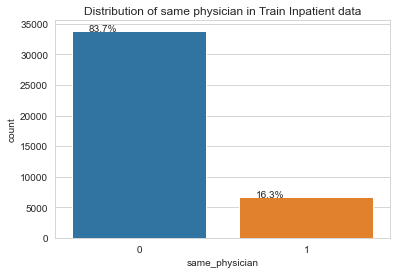

In [90]:
fig = plt.figure(figsize=(6,4))
ax=sns.countplot(data=train_inpatient,x='same_physician')
total = len(train_inpatient)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.title('Distribution of same physician in Train Inpatient data')
plt.show()

#### Observations
1. Only 16.3% claims have both attending and operating physician same.
2. Arround 83.7% claims have different physicians

#### Analyzing procedural codes

In [18]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_IP = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_IP['ProcedureCode'] = pd.concat([train_inpatient["ClmProcedureCode_1"], train_inpatient["ClmProcedureCode_2"],
                                   train_inpatient["ClmProcedureCode_3"],train_inpatient["ClmProcedureCode_4"], 
                                   train_inpatient["ClmProcedureCode_5"], train_inpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

In [19]:
print('we have totally {} no of procedural codes'.format( len(ClmProcedureCode_IP['ProcedureCode'].unique()) ) )

we have totally 1321 no of procedural codes


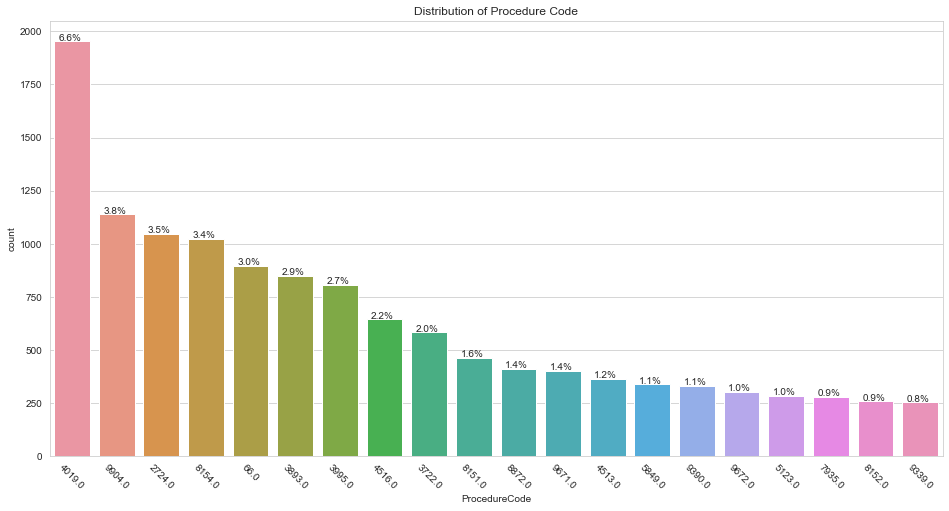

In [92]:
# Plot the countplot for top 20 claim precedure code
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_IP, order = ClmProcedureCode_IP['ProcedureCode'].value_counts().head(20).index)
total = len(ClmProcedureCode_IP)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.title('Distribution of Procedure Code')
plt.show()

#### Observations
1. 4019, 9904, 2714, 8154, 66 are the top 5 procedures 
2. 4019 test is procedured for 6.5% of the total procedures.

#### Analysing Daignosing codes

In [20]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_IP= pd.DataFrame(columns = ['DiagnosisCode'])
ClmDiagnosisCode_IP['DiagnosisCode'] = pd.concat([train_inpatient["ClmDiagnosisCode_1"], train_inpatient["ClmDiagnosisCode_2"], 
                                           train_inpatient["ClmDiagnosisCode_3"], train_inpatient["ClmDiagnosisCode_4"],
                                           train_inpatient["ClmDiagnosisCode_5"],train_inpatient["ClmDiagnosisCode_6"],
                                           train_inpatient["ClmDiagnosisCode_7"],train_inpatient["ClmDiagnosisCode_8"],
                                           train_inpatient["ClmDiagnosisCode_9"],train_inpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

In [21]:
print('we have totally {} no of diagnosis codes'.format( len(ClmDiagnosisCode_IP['DiagnosisCode'].unique()) ) )

we have totally 4716 no of diagnosis codes


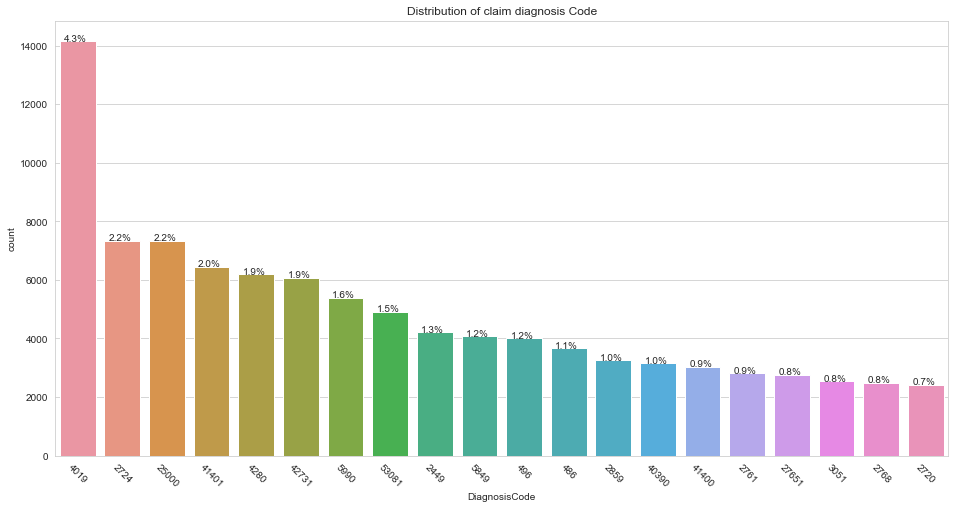

In [94]:
# Plot the countplot for top 20 claim precedure code
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_IP, order = ClmDiagnosisCode_IP['DiagnosisCode'].value_counts().head(20).index)
total = len(ClmDiagnosisCode_IP)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.title('Distribution of claim diagnosis Code')
plt.show()

### Observations
1. 4019, 2724, 25000, 41401, 4280 are the top 5 diagnosis codes considering number of diagnosos done.
2. 4019 test is diagnosed for 4.3% of the total diagnosis.
3. 4019 is top and common code in both procedure and diagnosis codes

#### How much inpatient InscClaimAmtReimbursed for each beneficiary

In [95]:
# Calculate total InscClaimAmtReimbursed for inpatient
print('total insurance claim amount reimbursed is',train_inpatient['InscClaimAmtReimbursed'].notna().sum() )

total insurance claim amount reimbursed is 40474


<Figure size 720x720 with 0 Axes>

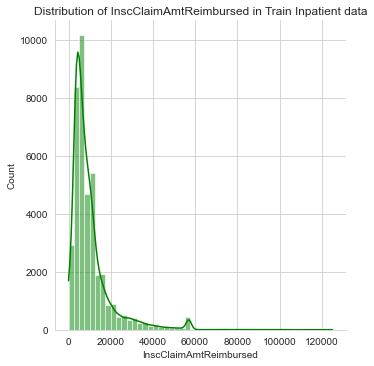

In [96]:
# Plot distribution of IPAnnualReimbursementAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
sns.displot(train_inpatient['InscClaimAmtReimbursed'], kde = True, color ='green', bins = 50)
plt.title('Distribution of InscClaimAmtReimbursed in Train Inpatient data')
plt.show()

#### Observations
1. total claimed amount is 40474 

#### how much amount deducted (DeductibleAmtPaid ) for a claim

In [97]:
# Calculate total DeductibleAmtPaid for inpatient
print('total DeductibleAmtPaid for patient is',train_inpatient['DeductibleAmtPaid'].notna().sum() )

total DeductibleAmtPaid for patient is 39575


<Figure size 720x720 with 0 Axes>

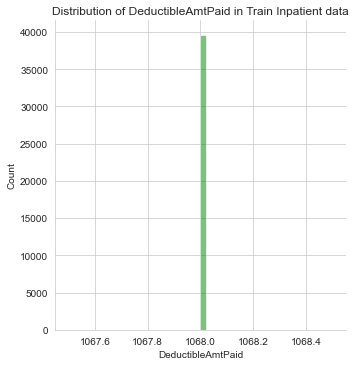

In [98]:
# Plot distribution of IPAnnualReimbursementAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
sns.displot(train_inpatient['DeductibleAmtPaid'], kde = True, color ='green', bins = 50)
plt.title('Distribution of DeductibleAmtPaid in Train Inpatient data')
plt.show()

#### Observations
1. Total deductible amount is either 0 or 1068.

#### Analysing Out patient data

In [24]:
train_outpatient=pd.read_csv('Train_Outpatientdata.csv')
train_outpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


In [25]:
test_outpatient=pd.read_csv('Test_Outpatientdata.csv')
test_outpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [101]:
train_outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

#### Outpatients are those who came for doctor visits and not admitted in hospital
1. BeneID: It contains the unique id of each beneficiary i.e patients.
2. ClaimID: It contains the unique id of the claim submitted by the provider.
3. ClaimStartDt: It contains the date when the claim started in yyyy-mm-dd format.
4. ClaimEndDt: It contains the date when the claim ended in yyyy-mm-dd format.
5. Provider: It contains the unique id of the provider.
6. InscClaimAmtReimbursed: It contains the amount reimbursed for that particular claim.
7. AttendingPhysician: It contains the id of the Physician who attended the patient.
8. OperatingPhysician: It contains the id of the Physician who operated on the patient.
9. OtherPhysician: It contains the id of the Physician other than AttendingPhysician and OperatingPhysician who treated the patient.
10. ClmDiagnosisCode: It contains codes of the diagnosis performed by the provider on the patient for that claim.
11. ClmProcedureCode: It contains the codes of the procedures of the patient for treatment for that particular claim.
12. DeductibleAmtPaid: It consists of the amount by the patient. That is equal to Total_claim_amount — Reimbursed_amount.

#### Analyzing ClaimStartDt and ClaimEndDt

In [26]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
train_outpatient['ClaimStartDt'] = pd.to_datetime(train_outpatient['ClaimStartDt'] , format = '%Y-%m-%d')
train_outpatient['ClaimEndDt'] = pd.to_datetime(train_outpatient['ClaimEndDt'],format = '%Y-%m-%d')

test_outpatient['ClaimStartDt'] = pd.to_datetime(test_outpatient['ClaimStartDt'] , format = '%Y-%m-%d')
test_outpatient['ClaimEndDt'] = pd.to_datetime(test_outpatient['ClaimEndDt'],format = '%Y-%m-%d')

In [27]:
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
train_outpatient['claim_period'] = ((train_outpatient['ClaimEndDt'] - train_outpatient['ClaimStartDt']).dt.days)+1

test_outpatient['claim_period'] = ((test_outpatient['ClaimEndDt'] - test_outpatient['ClaimStartDt']).dt.days)+1

In [104]:
train_outpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,claim_period
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,1
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,1


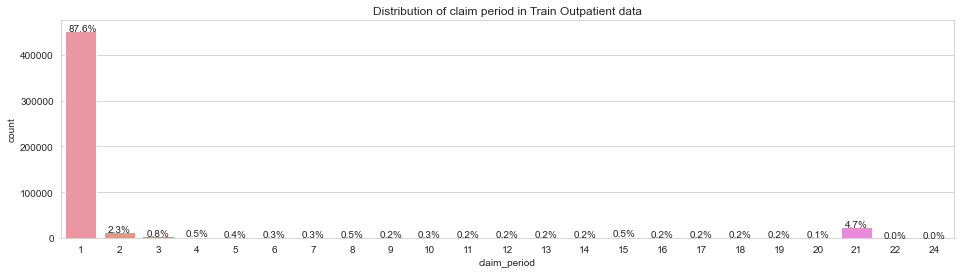

In [105]:
fig = plt.figure(figsize=(16,4))
ax=sns.countplot(data=train_outpatient,x='claim_period')
total = len(train_outpatient)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.title('Distribution of claim period in Train Outpatient data')
plt.show()

#### Observations
1. Almost 87.6% of patients claim period is just a day.
2. suspiciously we have 4.7% of claims claim period is 21 days

In [41]:
print('we have totally {} no of beneficiaries'.format( len(train_outpatient['BeneID'].unique()) ) )

we have totally 133980 no of beneficiaries


#### These are top 20 BeneID based on no of claims

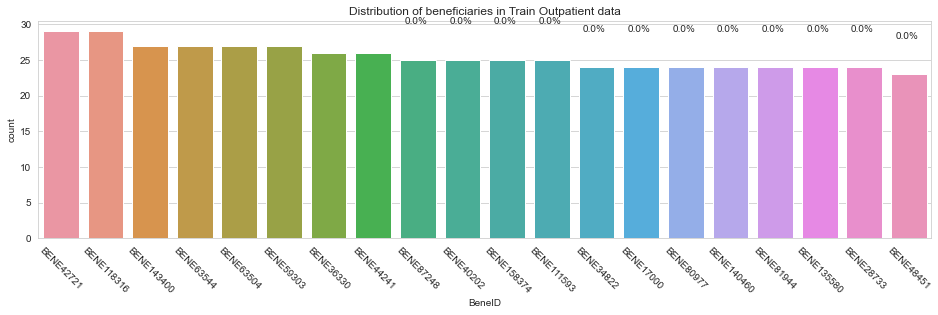

In [106]:
#top 20 No of claims per BeneID
fig = plt.figure(figsize=(16,4))
ax=sns.countplot(data=train_outpatient,x='BeneID',order = train_outpatient['BeneID'].value_counts().iloc[:20].index)
total = len(train_outpatient)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.xticks(rotation=-45, size=10)
plt.title('Distribution of beneficiaries in Train Outpatient data')
plt.show()

#### Observations
1. Top 20 no of claims per beneficiary id
2. BENE42721, BENE118316 has claimed arround 28 claims

In [42]:
print('we have totally {} no of Attending Physicians'.format( len(train_outpatient['AttendingPhysician'].unique()) ) )

we have totally 74110 no of Attending Physicians


#### Here are top 20 Attending physicians, lets check who stands out

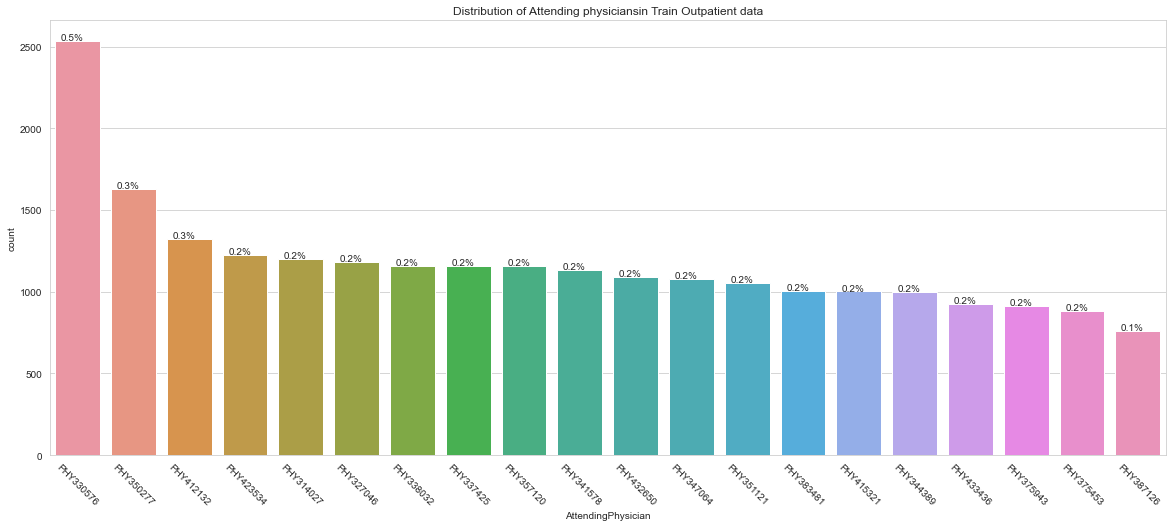

In [108]:
#top 20 Attending physicians
fig = plt.figure(figsize=(20,8))
ax=sns.countplot(data=train_outpatient,x='AttendingPhysician',order = train_outpatient['AttendingPhysician'].value_counts().iloc[:20].index)
total = len(train_outpatient)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.xticks(rotation=-45)
plt.title('Distribution of Attending physiciansin Train Outpatient data')
plt.show()

#### Observations
1. PHY330576 has attended 0.5% of patients.
2. PHY350277, PHY412132 has attended 0.3% patients each.
3. PHY330576, PHY350277, PHY412132, PHY423534, PHY314027 are the top 5 attending physicians

In [43]:
print('we have totally {} no of Operating Physicians'.format( len(train_outpatient['OperatingPhysician'].unique()) ) )

we have totally 28533 no of Operating Physicians


#### Here are top 20 Operating physicians, lets check who stands out

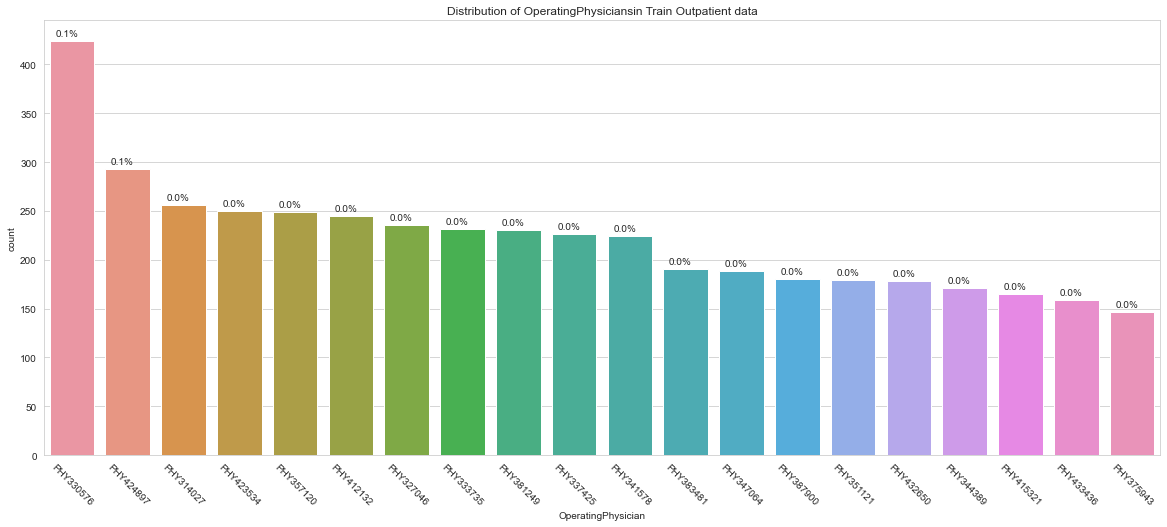

In [109]:
#top 20 operating physicians
fig = plt.figure(figsize=(20,8))
ax=sns.countplot(data=train_outpatient,x='OperatingPhysician',order = train_outpatient['OperatingPhysician'].value_counts().iloc[:20].index)
total = len(train_outpatient)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.xticks(rotation=-45)
plt.title('Distribution of OperatingPhysiciansin Train Outpatient data')
plt.show()

#### Observations
1. PHY330576, PHY424897, PHY314027, PHY423534, PHY357120 are the top 5 operating physicians 
2. PHY330576 operated 0.1% of the total patients i.e arround 450 patients.
3. PHY424897 has operated arround 280 patients

In [44]:
print('we have totally {} no of Other Physicians'.format( len(train_outpatient['OtherPhysician'].unique()) ) )

we have totally 44389 no of Other Physicians


#### Here are top 20 Other physicians, lets check who stands out

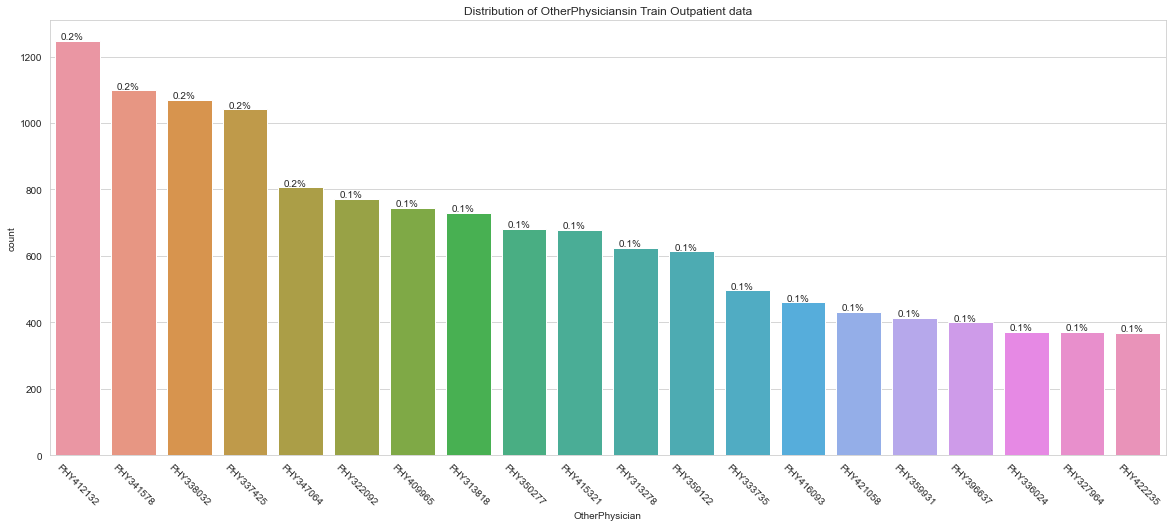

In [110]:
#top 20 other physicians
fig = plt.figure(figsize=(20,8))
ax=sns.countplot(data=train_outpatient,x='OtherPhysician',order = train_outpatient['OtherPhysician'].value_counts().iloc[:20].index)
total = len(train_outpatient)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.xticks(rotation=-45)
plt.title('Distribution of OtherPhysiciansin Train Outpatient data')
plt.show()

#### Observations
1. PHY412132, PHY341578, PHY338032, PHY337425, PHY347064 are the top 5 other physicians

#### Checking same physician

In [28]:
# checking same physician
train_outpatient['same_physician'] = np.where(train_outpatient['AttendingPhysician']==train_outpatient['OperatingPhysician'] , 1, 0)
test_outpatient['same_physician'] = np.where( test_outpatient['AttendingPhysician']==test_outpatient['OperatingPhysician'], 1, 0)

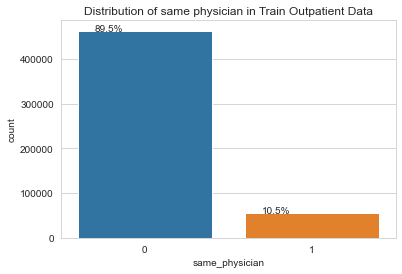

In [112]:
fig = plt.figure(figsize=(6,4))
ax=sns.countplot(data=train_outpatient,x='same_physician')
total = len(train_outpatient)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.title('Distribution of same physician in Train Outpatient Data')
plt.show()

#### Observations
1. Arround 89.5% patients have different physicians attend and operated
2. But we have 10.5%of patients with same attended and operated physician

#### claim precedurecodes

In [46]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_OP = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_OP['ProcedureCode'] = pd.concat([train_outpatient["ClmProcedureCode_1"], train_outpatient["ClmProcedureCode_2"],
                                   train_outpatient["ClmProcedureCode_3"],train_outpatient["ClmProcedureCode_4"], 
                                   train_outpatient["ClmProcedureCode_5"], train_outpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

In [48]:
print('we have totally {} no of procedural codes'.format( len(ClmProcedureCode_OP['ProcedureCode'].unique()) ) )

we have totally 104 no of procedural codes


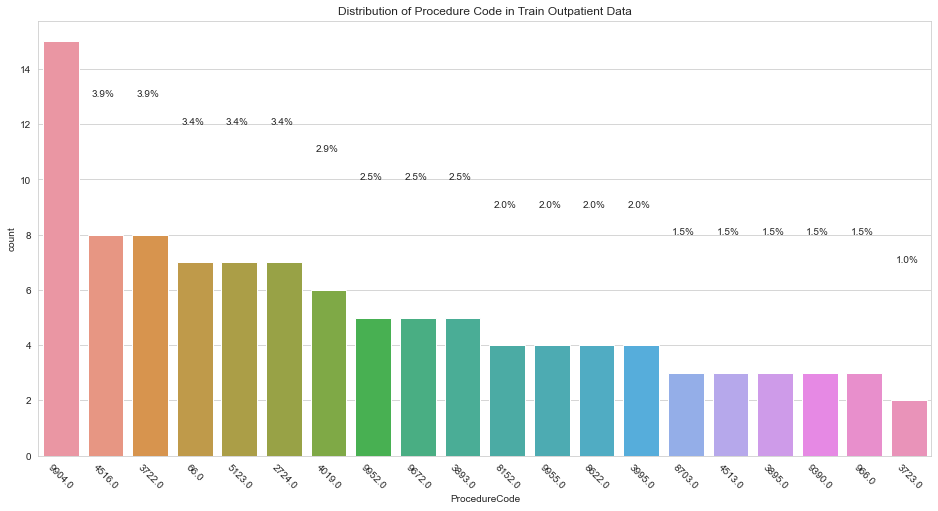

In [114]:
# Plot the countplot for top 20 claim precedure code
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_OP, order = ClmProcedureCode_OP['ProcedureCode'].value_counts().head(20).index)
total = len(ClmProcedureCode_OP)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
     
plt.xticks(rotation=-45)
plt.title('Distribution of Procedure Code in Train Outpatient Data')
plt.show()

#### Observations
1. These are the top 20 procedural codes
2. 9904 has arround 7.4% of procedures followed
3. 9904,4516,3722,66,5123 are the top 5 procedures followed.

#### ClmDiagnosisCode

In [49]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_OP= pd.DataFrame(columns = ['DiagnosisCode'])
ClmDiagnosisCode_OP['DiagnosisCode'] = pd.concat([train_outpatient["ClmDiagnosisCode_1"], train_outpatient["ClmDiagnosisCode_2"], 
                                           train_outpatient["ClmDiagnosisCode_3"], train_outpatient["ClmDiagnosisCode_4"],
                                           train_outpatient["ClmDiagnosisCode_5"],train_outpatient["ClmDiagnosisCode_6"],
                                           train_outpatient["ClmDiagnosisCode_7"],train_outpatient["ClmDiagnosisCode_8"],
                                           train_outpatient["ClmDiagnosisCode_9"],train_outpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

In [50]:
print('we have totally {} no of Diagnosis codes'.format( len(ClmDiagnosisCode_OP['DiagnosisCode'].unique()) ) )

we have totally 10846 no of Diagnosis codes


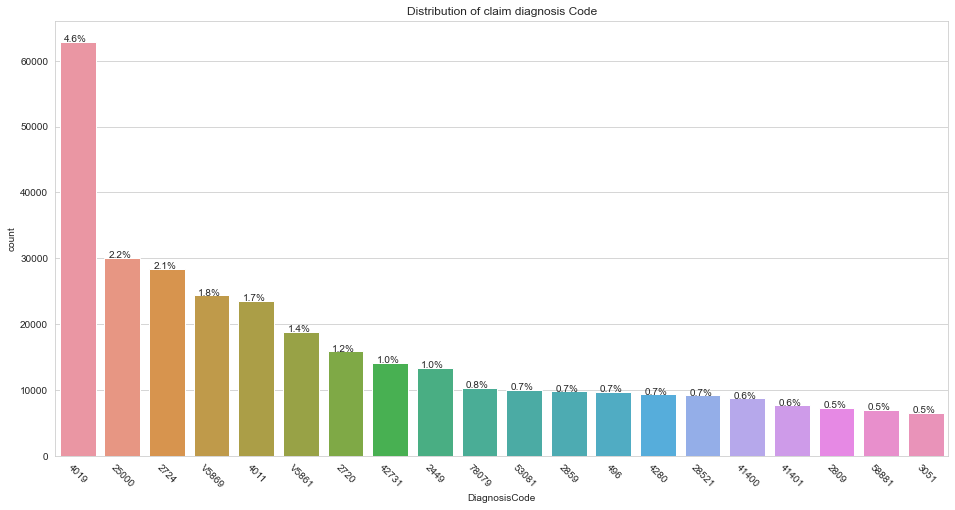

In [116]:
# Plot the countplot for top 20 claim precedure code
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_OP, order = ClmDiagnosisCode_OP['DiagnosisCode'].value_counts().head(20).index)
total = len(ClmDiagnosisCode_OP)*1
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.xticks(rotation=-45)
plt.title('Distribution of claim diagnosis Code')
plt.show()

#### Observations
1. these ate top 20 diagnosis codes followed
2. 4019 code has diaqgnised for arround 4.6% of patients
3. 4019,25000,2724,v5869,4011 are the top codes followed.

#### lets check how mouch amount (InscClaimAmtReimbursed) reimbursed on claims

In [117]:
# Calculate total InscClaimAmtReimbursed for inpatient
print('total insurance claim amount reimbursed is',train_outpatient['InscClaimAmtReimbursed'].notna().sum() )

total insurance claim amount reimbursed is 517737


<Figure size 720x720 with 0 Axes>

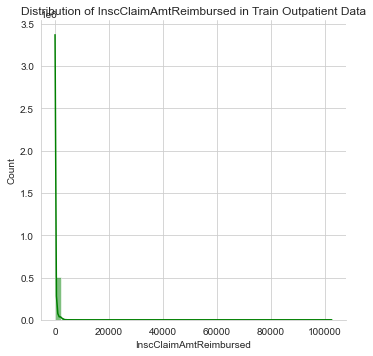

In [118]:
# Plot distribution of IPAnnualReimbursementAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
sns.displot(train_outpatient['InscClaimAmtReimbursed'], kde = True, color ='green', bins = 50)
plt.title('Distribution of InscClaimAmtReimbursed in Train Outpatient Data')
plt.show()

#### Observations
1. Total insurance claimed amount is 517737

#### lets check how much amount deducted (DeductibleAmtPaid) per claim

In [119]:
# Calculate total DeductibleAmtPaid for inpatient
print('total DeductibleAmtPaid for patient is',train_outpatient['DeductibleAmtPaid'].notna().sum() )

total DeductibleAmtPaid for patient is 517737


<Figure size 720x720 with 0 Axes>

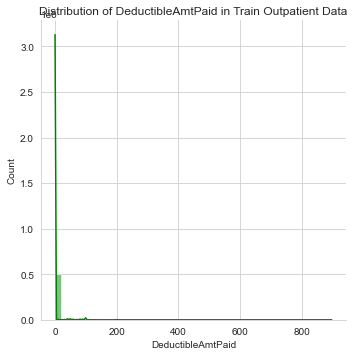

In [120]:
# Plot distribution of IPAnnualReimbursementAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
sns.displot(train_outpatient['DeductibleAmtPaid'], kde = True, color ='green', bins = 50)
plt.title('Distribution of DeductibleAmtPaid in Train Outpatient Data')
plt.show()

#### Observations
1. Total deductible amount is 517737
2. both claimed amount and deductible amount are same

#### Before merging all datasets we create another column is in_outpatient to distinguish whether the patient is inpatient or outpatient

In [34]:
# Create a new column In_Outpatient where Inpatient =1 and Outpatient = 0
train_inpatient['In_Outpatient'] = 1
train_outpatient['In_Outpatient'] = 0
test_inpatient['In_Outpatient'] = 1
test_outpatient['In_Outpatient'] = 0

#### Merging all datasets (Beneficiary data, Inpatient data, Outpatient data, Provider data)

In [35]:
#common colums in inpatient and outpatient data
common_columns = [ idx for idx in train_outpatient.columns if idx in train_inpatient.columns]
print(common_columns)

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode', 'claim_period', 'same_physician', 'In_Outpatient']


In [36]:
#merging inpatient and outpatient data
Inpatient_Outpatient_Merge = pd.merge(train_inpatient, train_outpatient, left_on = common_columns, right_on = common_columns,how = 'outer')

In [37]:
Inpatient_Outpatient_Merge.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,claim_period,Hospitalized_period,ExtraClaimDays,same_physician,In_Outpatient
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,NaN,NaN,NaN,NaN,NaN,7,7.0,0.0,0,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,NaN,3,3.0,0.0,1,1


In [38]:
# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge = pd.merge(Inpatient_Outpatient_Merge, train_benf_data,left_on='BeneID',right_on='BeneID',how='inner')
Inpatient_Outpatient_Beneficiary_Merge.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,risk_score,age,died
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,0,1,1,36000,3204,60,70,7,67.0,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,0,1,1,36000,3204,60,70,7,67.0,0


In [48]:
# Merge provider details
Final_Train_data = pd.merge(Inpatient_Outpatient_Beneficiary_Merge, provider_data , how = 'inner', on = 'Provider' )
Final_Train_data.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,risk_score,age,died,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,36000,3204,60,70,7,67.0,0,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,...,0,0,24000,2136,450,200,5,78.0,0,Yes


In [64]:
Final_Train_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'claim_period', 'Hospitalized_period',
       'ExtraClaimDays', 'same_physician', 'In_Outpatient', 'DOB', 'DOD',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
    

#### Test dataset

In [40]:
# Merge inpatient and outpatient dataframes based on common columns
common_columns_test = [ idx for idx in test_outpatient.columns if idx in test_inpatient.columns]
Inpatient_Outpatient_Merge_Te = pd.merge(test_inpatient, test_outpatient, left_on = common_columns_test, right_on = common_columns_test,how = 'outer')

# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge_Te = pd.merge(Inpatient_Outpatient_Merge_Te, test_benf_data,left_on='BeneID',right_on='BeneID',how='inner')

Final_Test_data = pd.merge(Inpatient_Outpatient_Beneficiary_Merge_Te, test_provider_data , how = 'inner', on = 'Provider' )
Final_Test_data.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,risk_score,age,died
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,0,0,0,21260,2136,120,100,5,72.0,0
1,BENE23826,CLM56697,2009-06-22,2009-06-24,PRV57070,3000,PHY427017,NaN,PHY351953,2009-06-22,...,0,1,0,8000,2136,2540,1880,8,73.0,0


#### Analyzing all the features by distinguishing whether fraud or not

In [129]:
# https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 10):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    plt.show()

#### will race1 claims are fraud since they are more in number!! let's check

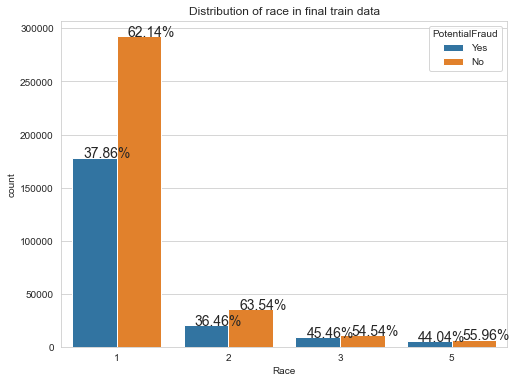

In [130]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(data=Final_Train_data,x='Race', hue='PotentialFraud')
plt.title('Distribution of race in final train data')
percentage_with_hue(ax, Final_Train_data.Race, 4,2,-0.1,200, 14)
plt.show()

#### Observations
1. Most of the fraud claims are from patients in race1 while considering count.
2. where Most fraud claims are from race3 while considering percentage among particular race.
3. we dont have patients from race4

#### we got more fraud claims in inpatient data of all races

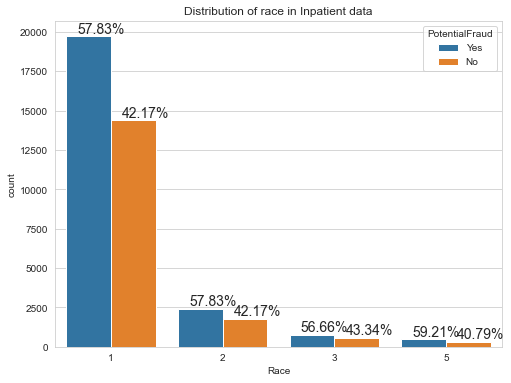

In [131]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(data=Final_Train_data[Final_Train_data['In_Outpatient']==1],x='Race', hue='PotentialFraud')
plt.title('Distribution of race in Inpatient data')
percentage_with_hue(ax, Final_Train_data[Final_Train_data['In_Outpatient']==1].Race, 4,2,-0.1,200, 14)
plt.show()

#### Chance of fraud claim is less in Outpatient

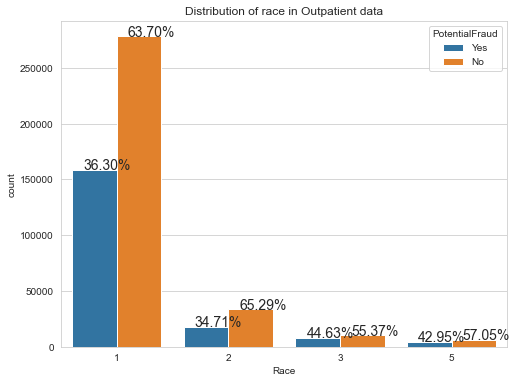

In [132]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(data=Final_Train_data[Final_Train_data['In_Outpatient']==0],x='Race', hue='PotentialFraud')
plt.title('Distribution of race in Outpatient data')
percentage_with_hue(ax, Final_Train_data[Final_Train_data['In_Outpatient']==0].Race, 4,2,-0.1,200, 14)
plt.show()

#### Observations
1. we can observe most of the fraud claims are from Inpatient data, because there is a easy way to claim for more money.
2. comaparitively we have more genuine claims from Outpatient data.

#### Does Age matter in fraud claims, let's see

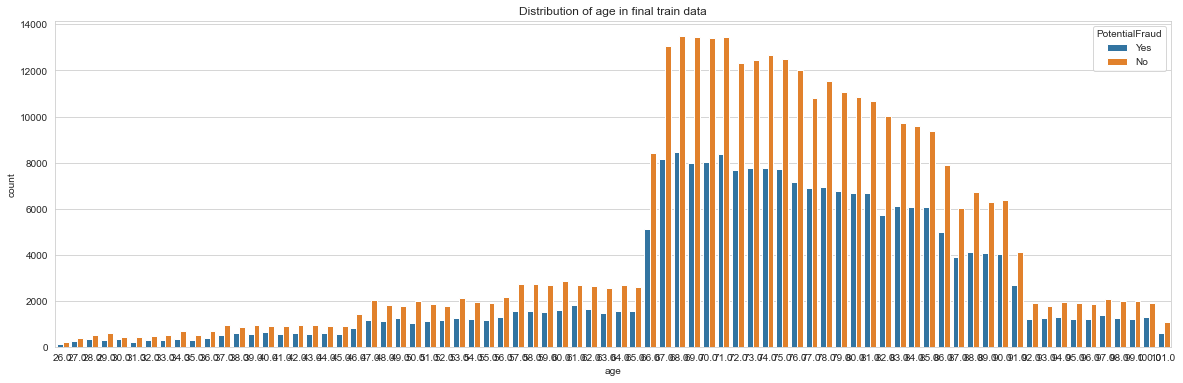

In [133]:
fig = plt.figure(figsize=(20,6))
ax=sns.countplot(data=Final_Train_data,x='age', hue='PotentialFraud')
plt.title('Distribution of age in final train data')
plt.show()

#### Observations
1. we can observe there are fraud claims for every age.
2. But we have less fraud claims in every age comapritively.
3. we have more patients from age66-91 and we have more fraud claims of patients belongs to the same age group.

#### Does Gender differes fraud claims, Have a look on distribution

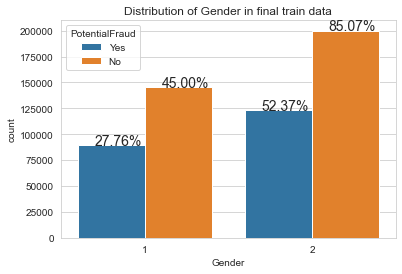

In [134]:
fig = plt.figure(figsize=(6,4))
ax=sns.countplot(data=Final_Train_data,x='Gender', hue='PotentialFraud')
plt.title('Distribution of Gender in final train data')
percentage_with_hue(ax, Final_Train_data.Gender,2,2,-0.1,200, 14)
plt.show()

#### Observations
1. we have less fraud claims from gender1 than gender2

#### To know whether the patient belongs to IN or OUT patient

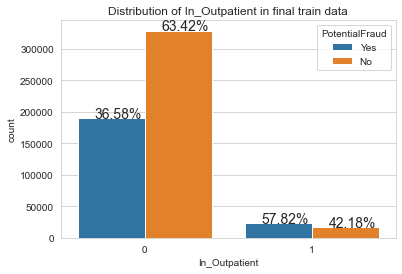

In [135]:
fig = plt.figure(figsize=(6,4))
ax=sns.countplot(data=Final_Train_data,x='In_Outpatient', hue='PotentialFraud')
plt.title('Distribution of In_Outpatient in final train data')
percentage_with_hue(ax, Final_Train_data.In_Outpatient, 2,2,-0.1,200, 14)
plt.show()

#### Observations
1. we have more fraud claims from Inpatient data
2. But In patient data fraud claims are less than the non fraud claims.
3. while in outpatient data fraud claims are more than non fraud claims.

#### Does high risk_score means fraud claim??

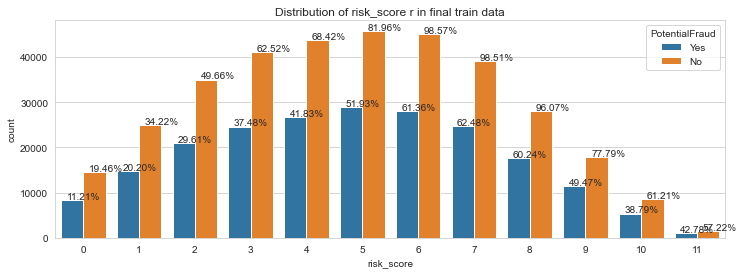

In [136]:
fig = plt.figure(figsize=(12,4))
ax=sns.countplot(data=Final_Train_data,x='risk_score', hue='PotentialFraud')
plt.title('Distribution of risk_score r in final train data')
percentage_with_hue(ax, Final_Train_data.risk_score, 12,2,-0.1,200, 10)
plt.show()

#### Observations
1. Distribution of fraud and non fraud is similar along the risk score.
2. we have less fraud claims than non fraud at each risk score.
3. From risk 2-8 the fraud claims are more.

#### 'ProcedureCode differes fraud claims

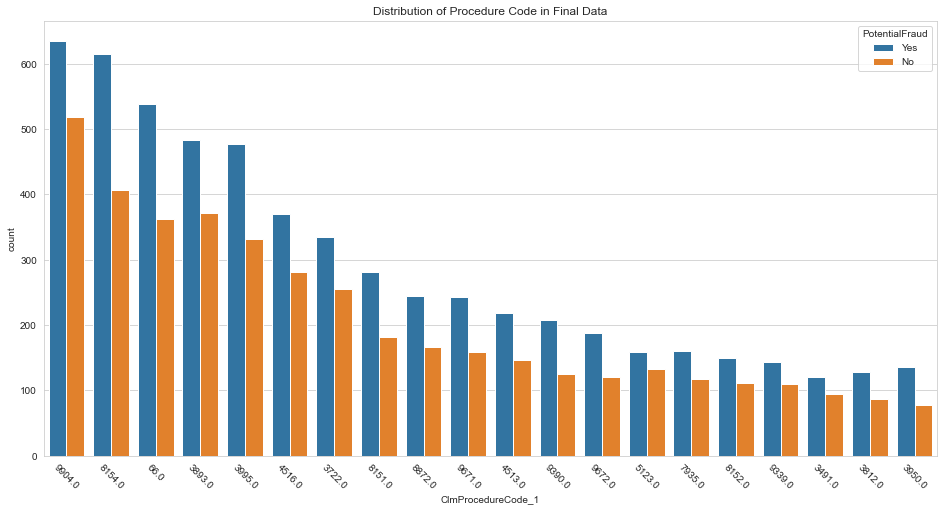

In [137]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ClmProcedureCode_1', data=Final_Train_data, hue='PotentialFraud',order = Final_Train_data['ClmProcedureCode_1'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code in Final Data')
plt.xticks(rotation=-45)
plt.show()

#### Observations
1. top 20 procedural codes in final data
2. we have more fraud claims with these procedural codes than non fraud claims.
3. 9904,8154,66,3893,3995 are top 5 fraud procedural codes

#### which diagnosis codes are performed for fraud claims?

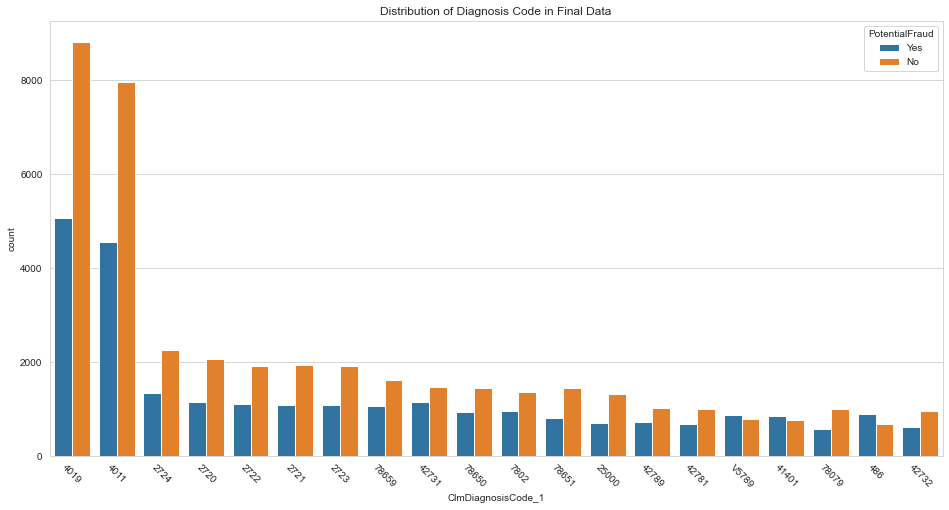

In [138]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ClmDiagnosisCode_1', data=Final_Train_data, hue='PotentialFraud',order = Final_Train_data['ClmDiagnosisCode_1'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code in Final Data')
plt.xticks(rotation=-45)
plt.show()

#### Observations
1. we observe less fraud activity in diagnosis codes than procedural codes
2. 4019,4011,2724,2720,2722 are top diagnosis codes
3. we can observe 4019,4011 gas more fraud activity

#### Let's check the count of potential fraud claims for each state and see whether any state stand outs

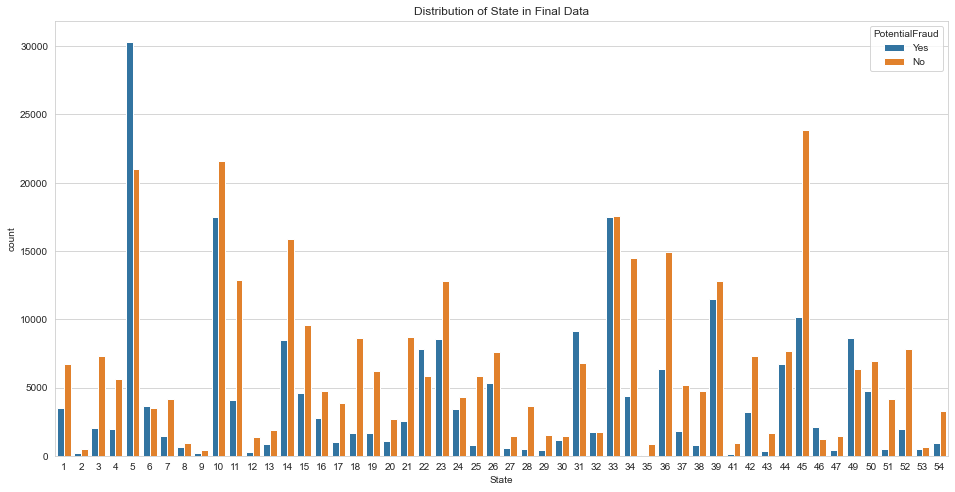

In [139]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='State', data=Final_Train_data, hue='PotentialFraud')
plt.title('Distribution of State in Final Data')
plt.show()

#### Observations
1. The fraud activity is more in the states 5,10,33,39,45,49
2. we have more fraud claims than non fraud from these states 5,6,22,31,33,49
3. we have veru low fraud claims from states 2,9,12,35,41,43

#### Let's check the count of potential fraud claims for each country and see whether any state stand outs

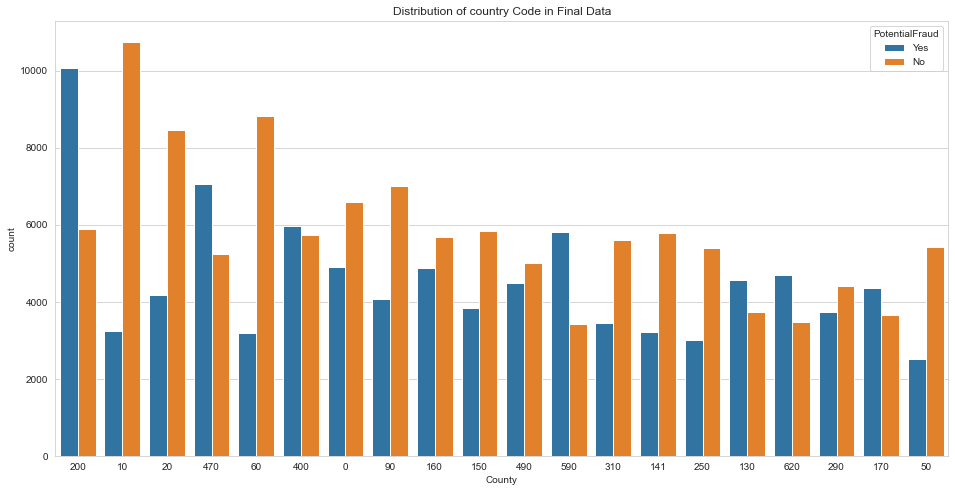

In [140]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='County', data=Final_Train_data, hue='PotentialFraud',order = Final_Train_data['County'].value_counts().head(20).index)
plt.title('Distribution of country Code in Final Data')
plt.show()

#### Observations
1. we have more fraud activity from these countries 200,470,400,590,130,620,170
2. And less fraud claims are from these countries 10,60,310,141,250,50
3. suspicious countries are 200,590,470

#### we got fraud AttendingPhysicians

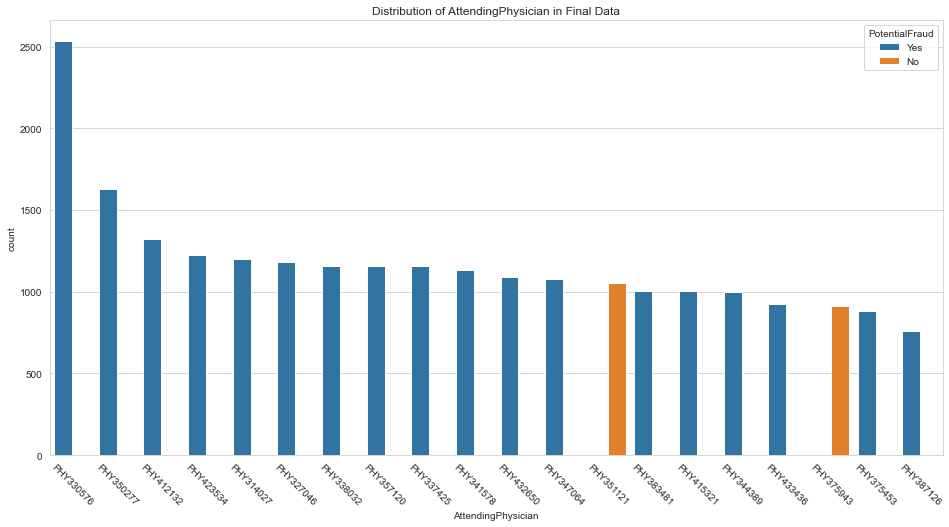

In [141]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='AttendingPhysician', data=Final_Train_data, hue='PotentialFraud',order = Final_Train_data['AttendingPhysician'].value_counts().head(20).index)
plt.title('Distribution of AttendingPhysician in Final Data')
plt.xticks(rotation=-45)
plt.show()

#### Observations
1. we can observe most of the top 20 Attending physicians are fraud
2. PHY383481, PHY375453 attending physician admitted half of their cases as fraud. 

#### we have fraud OperatingPhysicians too

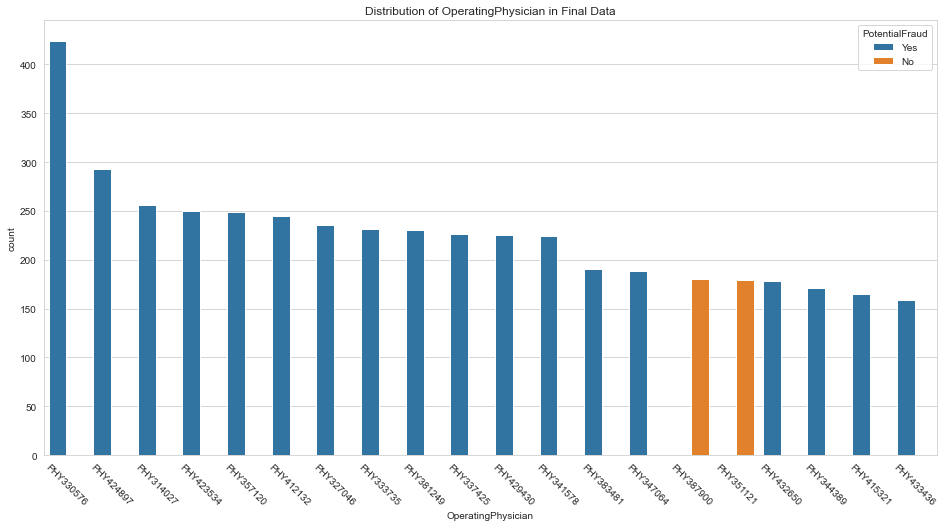

In [142]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OperatingPhysician', data=Final_Train_data, hue='PotentialFraud',order = Final_Train_data['OperatingPhysician'].value_counts().head(20).index)
plt.title('Distribution of OperatingPhysician in Final Data')
plt.xticks(rotation=-45)
plt.show()

#### Observations
1. 18 out 20 top operating physicians are admitting fraud claims
2. PHY387900, PHY351121 are genuine operating physicians

#### OMG Does all OtherPhysician are fraud??

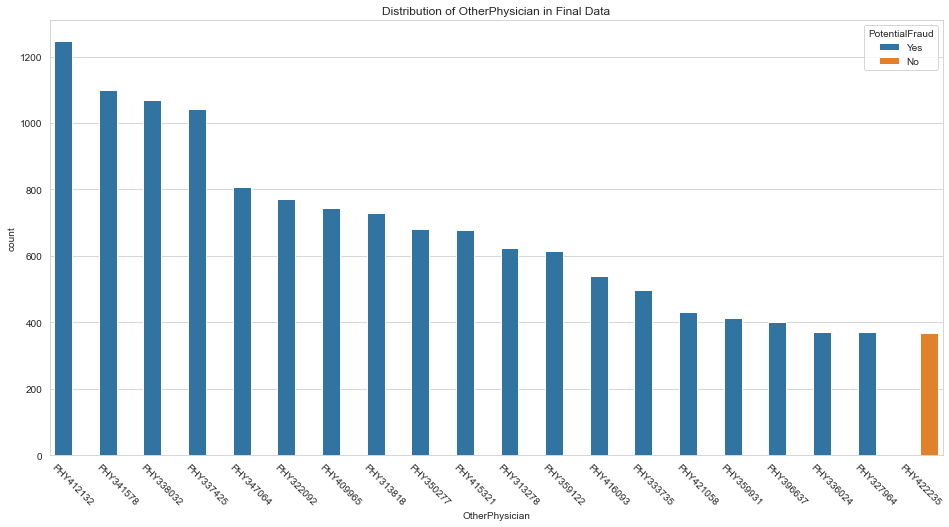

In [143]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OtherPhysician', data=Final_Train_data, hue='PotentialFraud',order = Final_Train_data['OtherPhysician'].value_counts().head(20).index)
plt.title('Distribution of OtherPhysician in Final Data')
plt.xticks(rotation=-45)
plt.show()

#### Observations
1. top 19 otherphysicians are fraud admitting ones.
2. PHY422235 is the only one who is genuine in top 20 physicians

#### MULTIVARIATE ANALYSIS

#### lets see How Patient_Age and Claim_Period helps in differentiating

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


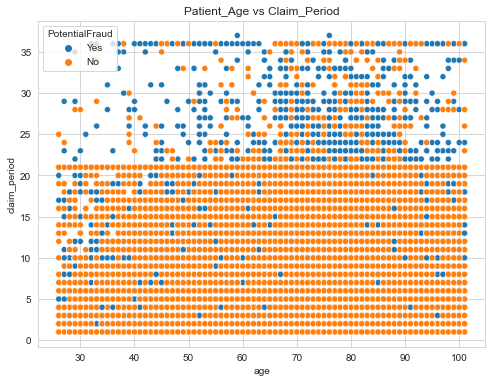

In [144]:
#Scatter Plot- Patient Age vs Claim_Period
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age',y='claim_period',data=Final_Train_data, hue='PotentialFraud')
plt.title('Patient_Age vs Claim_Period')
plt.show();

#### Observations
1. we have more fraud claims from age above 60 and claim period above 21
2. the chance of fraud claim is more for claim period more than 21

#### checking whether the claim is of genuine data by comapring Hospitalized_period and claim_period

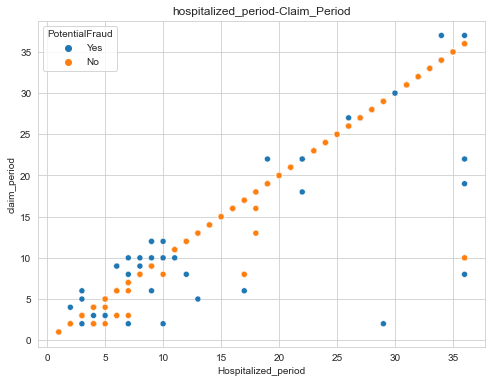

In [147]:
#Scatter Plot- Hospitalized_period vs Claim_Period
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hospitalized_period',y='claim_period',data=Final_Train_data[Final_Train_data['In_Outpatient']==1], hue='PotentialFraud')
plt.title('hospitalized_period-Claim_Period')
plt.show();

#### Observations
1. we got linear scatter plot
2. if the claim period and hospitalized period is same chance of fraud is low otherwise it may be fraud claim.

#### Here is a pair plot between age vs risk_score vs died

<Figure size 576x432 with 0 Axes>

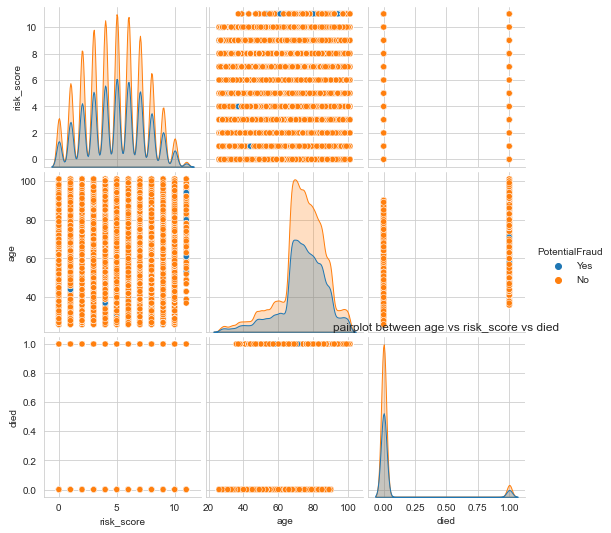

In [150]:
#https://stackoverflow.com/questions/64556501/plot-only-some-columns-with-seaborn-pairplot
#Pair Plot- age vs risk_score vs died
plt.figure(figsize=(8, 6))
sns.pairplot(data=Final_Train_data, vars=Final_Train_data.columns[59:62], hue='PotentialFraud')
plt.title('pairplot between age vs risk_score vs died')
plt.show()

#### Observations
1. feature died is not much useful for classifing.
2. we have more fraud activity from age 60-80

#### Does Patient Age and InscClaimAmtReimbursed related

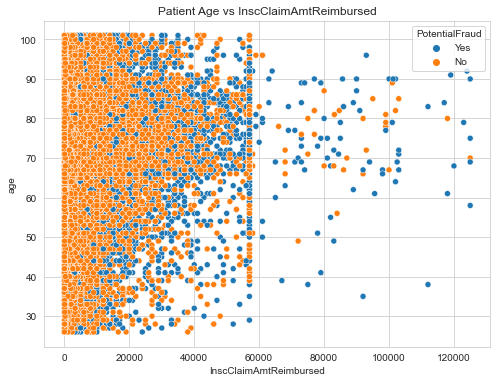

In [151]:
#Scatter Plot- Patient Age vs InscClaimAmtReimbursed
plt.figure(figsize=(8, 6))
sns.scatterplot(x='InscClaimAmtReimbursed',y='age',data=Final_Train_data, hue='PotentialFraud')
plt.title('Patient Age vs InscClaimAmtReimbursed')
plt.show()

#### Observations
1. we observe more fraud activity for insurance claim amount more than 40000
2. The plot is highly overlapped 

#### InscClaimAmtReimbursed' vs DeductibleAmtPaid

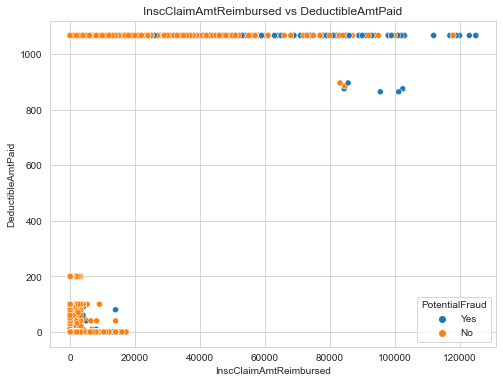

In [152]:
#Scatter Plot-InscClaimAmtReimbursed' vs DeductibleAmtPaid
plt.figure(figsize=(8, 6))
sns.scatterplot(x='InscClaimAmtReimbursed',y='DeductibleAmtPaid',data=Final_Train_data, hue='PotentialFraud')
plt.title('InscClaimAmtReimbursed vs DeductibleAmtPaid')
plt.show()

#### Observations
1. we know the deductible amount is either 0 or 1068
2. The claims with InscClaimAmtReimbursed more than 60000 are tend to be fraud claims

#### IPAnnualReimbursementAmt VS IPAnnualDeductibleAmt

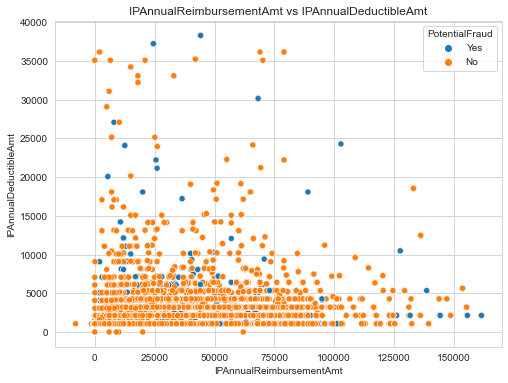

In [153]:
#Scatter Plot- IPAnnualReimbursementAmt vs IPAnnualDeductibleAmt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='IPAnnualReimbursementAmt',y='IPAnnualDeductibleAmt',data=Final_Train_data, hue='PotentialFraud')
plt.title('IPAnnualReimbursementAmt vs IPAnnualDeductibleAmt')
plt.show()

#### Observations
1. The plot is highly overlapped
2. there more likely chances for a claim to be fraud if deductible amount is high than reimbursement amount

#### Handling missing values

In [41]:
for col in Final_Train_data.columns:
    if Final_Train_data[col].isna().sum()!=0:
        print(col ,'--',Final_Train_data[col].isna().sum())

AttendingPhysician -- 1508
OperatingPhysician -- 443764
OtherPhysician -- 358475
AdmissionDt -- 517737
ClmAdmitDiagnosisCode -- 412312
DeductibleAmtPaid -- 899
DischargeDt -- 517737
DiagnosisGroupCode -- 517737
ClmDiagnosisCode_1 -- 10453
ClmDiagnosisCode_2 -- 195606
ClmDiagnosisCode_3 -- 315156
ClmDiagnosisCode_4 -- 393675
ClmDiagnosisCode_5 -- 446287
ClmDiagnosisCode_6 -- 473819
ClmDiagnosisCode_7 -- 492034
ClmDiagnosisCode_8 -- 504767
ClmDiagnosisCode_9 -- 516396
ClmDiagnosisCode_10 -- 553201
ClmProcedureCode_1 -- 534901
ClmProcedureCode_2 -- 552721
ClmProcedureCode_3 -- 557242
ClmProcedureCode_4 -- 558093
ClmProcedureCode_5 -- 558202
ClmProcedureCode_6 -- 558211
Hospitalized_period -- 517737
ExtraClaimDays -- 517737
DOD -- 554080


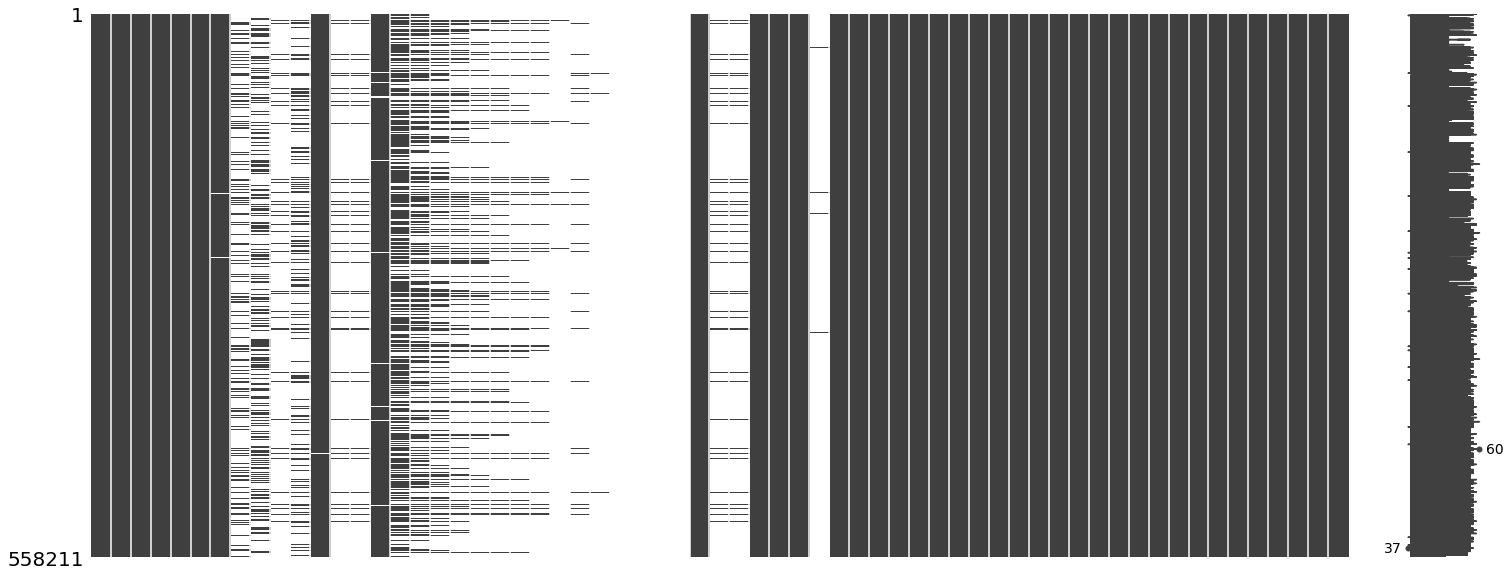

In [69]:
import missingno as msno

msno.matrix(Final_Train_data)
plt.show()

<AxesSubplot:>

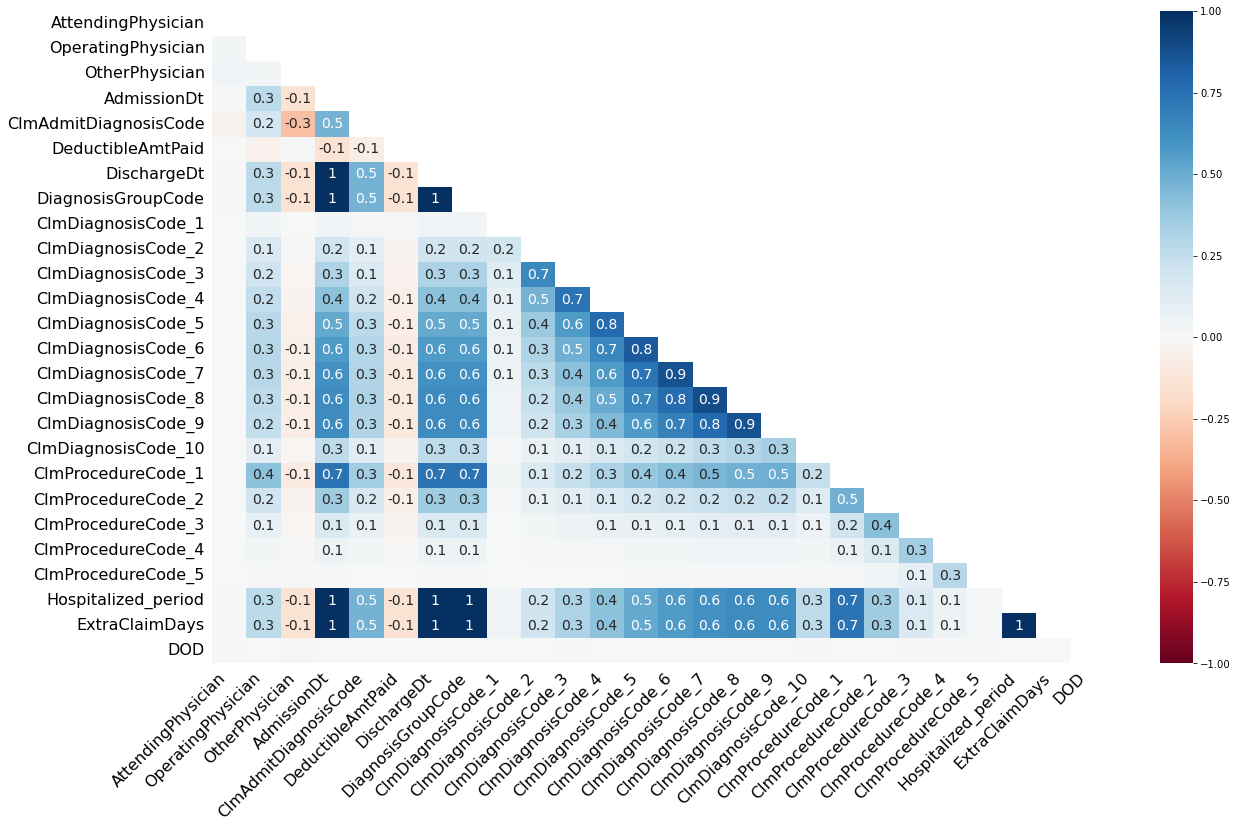

In [68]:
msno.heatmap(Final_Train_data)

1. claim procedure and diagnosis codes can't be interpreted so I will fill with 0 instead.
2. For Outpatients there will be no admission and discharge date so fill it with 0
3. Hospitalized period, claim period, extra claims will be 0 for outpatients.
4. For missing physician data we will fill with 0.

In [49]:
Final_Train_data=Final_Train_data.fillna(0)
Final_Test_data = Final_Test_data.fillna(0)

In [43]:
any(Final_Train_data.isna())

True

In [73]:
Final_Train_data.to_csv('Final_train_data_wo_avg.csv')
Final_Test_data.to_csv('Final_Test_data_wo_avg.csv')

#### Few conclusions need to be cleared
1. Total no claims?
2. Total money spent?
3. Total money spent on Fraud data?
4. Total money spent on non Fraud data?
5. Total money spent on Inpatient data?
6. Total money spent on Outpatient data?
7. Avereage reimbursed amount?
8. Average deductible amount?

In [157]:
In_claims = Final_Train_data.InscClaimAmtReimbursed[(Final_Train_data.In_Outpatient == 1)].count()
print('Total number of inpatient claims',In_claims)   
Out_claims = Final_Train_data.InscClaimAmtReimbursed[(Final_Train_data.In_Outpatient == 0)].count()
print('Total number of outpatient claims',Out_claims)           

Total number of inpatient claims 40474
Total number of outpatient claims 517737


In [158]:
#Calculatinng total and percentage money lost for overall data
Money_Spent = Final_Train_data.InscClaimAmtReimbursed.sum()
Money_Fraud = Final_Train_data.InscClaimAmtReimbursed[(Final_Train_data.PotentialFraud == 'Yes')].sum()
Money_Non_Fraud = Final_Train_data.InscClaimAmtReimbursed[(Final_Train_data.PotentialFraud == 'No')].sum()
print("Total money spent  ",Money_Spent)
print("Total money on fraud claims  ",Money_Fraud)
print("Percentage of money spent in fraud = {:.2f}%".format(Money_Fraud/Money_Spent *100))
print("Total money on non fraud claims  ",Money_Non_Fraud)
print("Percentage of money spent in non fraud claims = {:.2f}%".format(Money_Non_Fraud/Money_Spent *100))

Total money spent   556543140
Total money on fraud claims   295681120
Percentage of money spent in fraud = 53.13%
Total money on non fraud claims   260862020
Percentage of money spent in non fraud claims = 46.87%


In [75]:
#Calculatinng total and percentage money lost for Inpatient
Money_fraud_inpatient = Final_Train_data.InscClaimAmtReimbursed[(Final_Train_data.In_Outpatient == 1) & (Final_Train_data.PotentialFraud == 'Yes')].sum()
Money_inpatient = Final_Train_data.InscClaimAmtReimbursed[(Final_Train_data.In_Outpatient == 1)].sum()
print("Total money spent inpatient fraud claims : ",Money_fraud_inpatient)
print("Total money spent inpatient claims : ",Money_inpatient)
print("Percentage of money spent in fraud = {:.2f}%".format(Money_fraud_inpatient/Money_inpatient *100))

Total money spent inpatient fraud claims :  241288510
Total money spent inpatient claims :  408297020
Percentage of money spent in fraud = 59.10%


In [76]:
#Calculatinng total and percentage money lost for Inpatient
Money_fraud_outpatient = Final_Train_data.InscClaimAmtReimbursed[(Final_Train_data.In_Outpatient == 0) & (Final_Train_data.PotentialFraud == 'Yes')].sum()
Money_outpatient = Final_Train_data.InscClaimAmtReimbursed[(Final_Train_data.In_Outpatient == 0)].sum()
print("Total money spent outpatient fraud claims : ",Money_fraud_outpatient)
print("Total money spent outpatient claims : ",Money_outpatient)
print("Percentage of money spent in fraud = {:.2f}%".format(Money_fraud_outpatient/Money_outpatient *100))

Total money spent outpatient fraud claims :  54392610
Total money spent outpatient claims :  148246120
Percentage of money spent in fraud = 36.69%


https://www.kaggle.com/code/rohitrox/medical-provider-fraud-detection
From here we took the idea of grouping and averaging features

In [161]:
def Newfeature_groupby(Train_data,Test_data, op_col2,op, group_col):
    '''
    This function creates a new feature using groupby operation. it groups the test and train data using col1 
    and apply the aggregate functions on top of col2
    '''
    for g_col in group_col:
        Train=pd.DataFrame()
        Test=pd.DataFrame()
        for col in op_col2:
            # new column name for the dataframe
            new_name = 'Per'+''.join(g_col)+'_'+col+'_'+op
            print(new_name, end=' \n')
            Train[new_name] = Train_data.groupby(g_col)[col].transform(op)
            Test[new_name] = Test_data.groupby(g_col)[col].transform(op)
            
        Train_data= pd.concat([Train,Train_data],axis=1)
        Test_data=pd.concat([Test,Test_data], axis=1)
    return Train_data, Test_data

#### New averaging features

here we took median as a aggregating function, because it is less prone to outliers

In [162]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'age', 'Hospitalized_period', 'claim_period', 'risk_score']
new_groupby_columns=['BeneID','AttendingPhysician','OperatingPhysician','OtherPhysician',
                    'ClmAdmitDiagnosisCode','DiagnosisGroupCode',
                    'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
                    'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
                    'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
                    'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
                    'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
                    'ClmProcedureCode_6']

In [163]:
Final_Train_data,Final_Test_data =  Newfeature_groupby(Final_Train_data, Final_Test_data, columns, 'median', new_groupby_columns)

PerBeneID_InscClaimAmtReimbursed_median 
PerBeneID_DeductibleAmtPaid_median 
PerBeneID_IPAnnualReimbursementAmt_median 
PerBeneID_IPAnnualDeductibleAmt_median 
PerBeneID_OPAnnualReimbursementAmt_median 
PerBeneID_OPAnnualDeductibleAmt_median 
PerBeneID_age_median 
PerBeneID_Hospitalized_period_median 
PerBeneID_claim_period_median 
PerBeneID_risk_score_median 
PerAttendingPhysician_InscClaimAmtReimbursed_median 
PerAttendingPhysician_DeductibleAmtPaid_median 
PerAttendingPhysician_IPAnnualReimbursementAmt_median 
PerAttendingPhysician_IPAnnualDeductibleAmt_median 
PerAttendingPhysician_OPAnnualReimbursementAmt_median 
PerAttendingPhysician_OPAnnualDeductibleAmt_median 
PerAttendingPhysician_age_median 
PerAttendingPhysician_Hospitalized_period_median 
PerAttendingPhysician_claim_period_median 
PerAttendingPhysician_risk_score_median 
PerOperatingPhysician_InscClaimAmtReimbursed_median 
PerOperatingPhysician_DeductibleAmtPaid_median 
PerOperatingPhysician_IPAnnualReimbursementAmt_median

PerClmProcedureCode_2_Hospitalized_period_median 
PerClmProcedureCode_2_claim_period_median 
PerClmProcedureCode_2_risk_score_median 
PerClmProcedureCode_3_InscClaimAmtReimbursed_median 
PerClmProcedureCode_3_DeductibleAmtPaid_median 
PerClmProcedureCode_3_IPAnnualReimbursementAmt_median 
PerClmProcedureCode_3_IPAnnualDeductibleAmt_median 
PerClmProcedureCode_3_OPAnnualReimbursementAmt_median 
PerClmProcedureCode_3_OPAnnualDeductibleAmt_median 
PerClmProcedureCode_3_age_median 
PerClmProcedureCode_3_Hospitalized_period_median 
PerClmProcedureCode_3_claim_period_median 
PerClmProcedureCode_3_risk_score_median 
PerClmProcedureCode_4_InscClaimAmtReimbursed_median 
PerClmProcedureCode_4_DeductibleAmtPaid_median 
PerClmProcedureCode_4_IPAnnualReimbursementAmt_median 
PerClmProcedureCode_4_IPAnnualDeductibleAmt_median 
PerClmProcedureCode_4_OPAnnualReimbursementAmt_median 
PerClmProcedureCode_4_OPAnnualDeductibleAmt_median 
PerClmProcedureCode_4_age_median 
PerClmProcedureCode_4_Hospitalized

#### How many claims each provider claimed?

In [164]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'age', 'Hospitalized_period', 'claim_period', 'risk_score']
new_groupby_columns=['Provider']
Final_Train_data,Final_Test_data =  Newfeature_groupby(Final_Train_data, Final_Test_data, columns, 'count', new_groupby_columns)

PerProvider_InscClaimAmtReimbursed_count 
PerProvider_DeductibleAmtPaid_count 
PerProvider_IPAnnualReimbursementAmt_count 
PerProvider_IPAnnualDeductibleAmt_count 
PerProvider_OPAnnualReimbursementAmt_count 
PerProvider_OPAnnualDeductibleAmt_count 
PerProvider_age_count 
PerProvider_Hospitalized_period_count 
PerProvider_claim_period_count 
PerProvider_risk_score_count 


#### we have categorical feature race and gender so convert them

In [53]:
# Convert type of Gender and Race to categorical
Final_Train_data.Gender=Final_Train_data.Gender.astype('category')
Final_Test_data.Gender=Final_Test_data.Gender.astype('category')

Final_Train_data.Race=Final_Train_data.Race.astype('category')
Final_Test_data.Race=Final_Test_data.Race.astype('category')

In [54]:
#https://datagy.io/pandas-get-dummies/
# Do one hot encoding for gender and Race
Final_Train_data=pd.get_dummies(Final_Train_data,columns=['Gender','Race'])
Final_Test_data=pd.get_dummies(Final_Test_data,columns=['Gender','Race'])

In [52]:
Final_Train_data['RenalDiseaseIndicator'].value_counts()

0    448363
1    109848
Name: RenalDiseaseIndicator, dtype: int64

#### Replacing PotentialFraud column with 0 and 1

In [51]:
Final_Train_data['PotentialFraud']=Final_Train_data.PotentialFraud.replace(['Yes','No'],[1,0])
Final_Train_data['RenalDiseaseIndicator']=Final_Train_data.RenalDiseaseIndicator.replace(['Y'],1)

Final_Test_data['RenalDiseaseIndicator']=Final_Test_data.RenalDiseaseIndicator.replace(['Y'],1)

#### Removing unwanted columns

In [55]:
remove_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                'ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4','ClmDiagnosisCode_5',
                'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7','ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3','ClmProcedureCode_4', 'ClmProcedureCode_5',
                'ClmProcedureCode_6','ClmAdmitDiagnosisCode', 'AdmissionDt','DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD','State', 'County']

Final_Train_data=Final_Train_data.drop(columns=remove_columns, axis=1)
Final_Test_data=Final_Test_data.drop(columns=remove_columns, axis=1)

In [56]:
print('The shape of final train dataset',Final_Train_data.shape)
print('The shape of final test dataset',Final_Test_data.shape)

The shape of final train dataset (558211, 36)
The shape of final test dataset (135392, 35)


In [57]:
Final_Train_data.head(2)

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,claim_period,Hospitalized_period,ExtraClaimDays,same_physician,In_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,...,risk_score,age,died,PotentialFraud,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
0,PRV55912,26000,1068.0,7,7.0,0.0,0,1,0,12,...,7,67.0,0,1,1,0,1,0,0,0
1,PRV55912,50,0.0,1,0.0,0.0,0,0,0,12,...,5,78.0,0,1,1,0,1,0,0,0


In [171]:
Final_Test_data.head(2)

,PerProvider_InscClaimAmtReimbursed_count,PerProvider_DeductibleAmtPaid_count,PerProvider_IPAnnualReimbursementAmt_count,PerProvider_IPAnnualDeductibleAmt_count,PerProvider_OPAnnualReimbursementAmt_count,PerProvider_OPAnnualDeductibleAmt_count,PerProvider_age_count,PerProvider_Hospitalized_period_count,PerProvider_claim_period_count,PerProvider_risk_score_count,...,OPAnnualDeductibleAmt,risk_score,age,died,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
0,12,12,12,12,12,12,12,12,12,12,...,100,5,72.0,0,0,1,1,0,0,0
1,12,12,12,12,12,12,12,12,12,12,...,1880,8,73.0,0,0,1,1,0,0,0


#### Save Datasets

In [58]:
Final_Train_data.to_csv('train_data.csv')
Final_Test_data.to_csv('test__data.csv')